# PROTOTYPE: TABLETOP RECOMMENDER


[Twitch API](#Twitch-API)

[WebScraping Test](#Trying-webscraping-for-top-VG)

[Machine Learning](#Machine-Learning)

[Change nº of clusters](#Change-nº-of-clusters)

[Predict](#Temporary-stored-Kmeans2)

[User interaction](#Input)

[Img from Url](#Trying-to-show-image-from-url)

[Final Functions](#FINAL-FUNCTION-BELOW)




[DEMO](#DEMO)

## Main Idea

Create a board game recommender that asks users a board game they like.




### First problem to tackle

Resources<br>
<br>
https://www.boardgameatlas.com/<br>
<br>
https://www.igdb.com/discover<br>
<br>

* Are APIs linkable? What parameters are defined in DBs, are they translatable? i.e Param VG 'Fast-paced', 'Asymmetrical pvp', etc =? Param TTBG 'Arcade-like/Casual', 'Game Master', etc

#### importing

In [1567]:
# API

import requests

import pprint


# JIC
import random
import pandas as pd
from bs4 import BeautifulSoup




# To show images of recommendations OR also user's input
import urllib.request
from PIL import Image
from io import BytesIO
from matplotlib.pyplot import imshow


# Machine learning
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [38]:
!pip install igdb-api-v4

### Twitch API

##### Twitch API Token Generator and Refresher

In [238]:


Client_ID = '53pqt2rynymzr9990l1kq354c614kv'

def token_refresher(Client_ID):
    
    generate_token = requests.post(url=f"https://id.twitch.tv/oauth2/token?client_id={Client_ID}&client_secret=nbh6q4bbmywhi5stcqzl6ra0hrm8e2&grant_type=client_credentials")
    #print(generate_token.text)    
    # Client ID, Token    
    retrieval_token = generate_token.text # Str that has to be converted to dict to better access... NO RGEX YAHOOOO
    
    new = json.loads(retrieval_token) #Format already dict-like, this changes TYPE
    
    expires = round(new["expires_in"]/86400)
    new_token = new["access_token"] # DICT, 1st key is access_token, value is TOKEN
    
    wrapper = IGDBWrapper(Client_ID, new_token) # Add new generated token to wrapper
    
   
    return print(f"New Token Generated and Activated. Well Done. Expiration in: {expires} days.")

token_refresher(Client_ID)


########## back up  para hacerlo MANUAL

#token = requests.post(url="https://id.twitch.tv/oauth2/token?client_id=53pqt2rynymzr9990l1kq354c614kv&client_secret=nbh6q4bbmywhi5stcqzl6ra0hrm8e2&grant_type=client_credentials")
#print(token.text)

#from igdb.wrapper import IGDBWrapper
#wrapper = IGDBWrapper("53pqt2rynymzr9990l1kq354c614kv", "broaw9tl5y4gp80s6vi257ms618rgl")# Client ID, Token


New Token Generated and Activated. Well Done. Expiration in: 59 days.


In [342]:
from igdb.igdbapi_pb2 import GameResult
import json
from ast import literal_eval

byte_array = wrapper.api_request(
            'games', # Note the '.pb' suffix at the endpoint
            'fields id, name, genres.name, total_rating, url, cover, category; where rating != null; offset 1;') #  where genre != null

#byte_array

my_json = byte_array.decode('utf8').replace("'", '"')
VG_genres = json.loads(my_json)


pprint.pprint(VG_genres)


#type(VG_genres[0])


[{'category': 0,
  'cover': 43615,
  'genres': [{'id': 8, 'name': 'Platform'},
             {'id': 9, 'name': 'Puzzle'},
             {'id': 12, 'name': 'Role-playing (RPG)'},
             {'id': 31, 'name': 'Adventure'},
             {'id': 32, 'name': 'Indie'}],
  'id': 74857,
  'name': 'Transcend',
  'total_rating': 50.0,
  'url': 'https://www.igdb.com/games/transcend'},
 {'category': 0,
  'genres': [{'id': 14, 'name': 'Sport'}, {'id': 33, 'name': 'Arcade'}],
  'id': 100789,
  'name': 'Flying Arrow!.',
  'total_rating': 34.16185,
  'url': 'https://www.igdb.com/games/flying-arrow--1'},
 {'category': 0,
  'genres': [{'id': 12, 'name': 'Role-playing (RPG)'},
             {'id': 31, 'name': 'Adventure'},
             {'id': 32, 'name': 'Indie'}],
  'id': 35281,
  'name': 'Valiant: Resurrection',
  'total_rating': 60.0,
  'url': 'https://www.igdb.com/games/valiant-resurrection'},
 {'category': 0,
  'cover': 157017,
  'genres': [{'id': 15, 'name': 'Strategy'}, {'id': 32, 'name': 'Indie'}]

In [359]:
len(VG_genres)

10

In [357]:
VG_genre_name = VG_genres[0]["genres"][0]["name"]
VG_genre_id = VG_genres[0]["genres"][0]["id"]

VGlist_genre_name = []
VGlist_genre_id = []


for i in range(0, len(VG_genres[0]["genres"])):
    VG_genre_name = VG_genres[0]["genres"][i]["name"]
    VG_genre_id = VG_genres[0]["genres"][i]["id"]
    VGlist_genre_name.append(VG_genre_name)
    VGlist_genre_id.append(VG_genre_id)
    
    
VGlist_genre_name
VGlist_genre_id  
# LISTS WITH JUST GENRE_ID AND GENRE_NAME FOR 1ST GAME

['Platform', 'Puzzle', 'Role-playing (RPG)', 'Adventure', 'Indie']

In [180]:
VARIABLE_ID = 157017

byte_array = wrapper.api_request(
            'covers', # Note the '.pb' suffix at the endpoint
            f'fields id, height, width, game, url, image_id; where id = {VARIABLE_ID};') #  where genre != null
    


my_json = byte_array.decode('utf8').replace("'", '"')
data = json.loads(my_json)
#s = json.dumps(data, indent=4, sort_keys=True)


image_print_id = data[0]['image_id']
image_print_id

#[{'id': 74857, ########
#  'category': 0,
#  'cover': 43615, ########
#  'genres': [{'id': 8, 'name': 'Platform'},
#   {'id': 9, 'name': 'Puzzle'},
#   {'id': 12, 'name': 'Role-playing (RPG)'},
#   {'id': 31, 'name': 'Adventure'},
#   {'id': 32, 'name': 'Indie'}],
#  'name': 'Transcend',
#  'total_rating': 50.0,
#  'url': 'https://www.igdb.com/games/transcend'},

'co3d5l'

### BG ATLAS API

##### Link to API Documentation

https://www.boardgameatlas.com/api/docs

#### Parameters selected to do clustering <br>


* mechanics
* categories 
* average_learning_complexity
* average_strategy_complexity

 <br>
 <br>
 

#### To show when recommendation is given <br>

* image of BG
* rulers_url
* learning complexity  # show as a bar chart 4ex, showing input and recommendation
* strategy complexity
* range of players
* msrp in €


possible searches <br>

* Woote to be sick
* Catan
* Secret Hitler

#### 2 approaches to get data

* _FULL REQUEST_ = 1 request that has it all -> sort it out in a single dict -> create df -> ML

* _INDIVIDUAL REQUESTS_ = X requests for X parameters -> create dicts individually -> create df -> ML

##### FULL REQUEST

In [472]:
# So many times I'm getting confused because of the type and length of stuff that I was thinking nothing was working so... Did this little function

def tylen(x):
    '''
    Enter iterable object and it will give length and type.
    Useful during certain processes.
    '''
    return len(x), type(x)


In [1678]:
search_all = ''

def BG_requester(search_all, limit, page):
    
    '''
    Enter _page_ which is the amount of boardgames we will skip to iterate through it
    
    '''   
    FULLREQ_bgatlas = requests.get(url = f'https://api.boardgameatlas.com/api/search?name={search_all}&client_id=U3E6STzUeQ&limit={limit}&skip={page}&fields=id,name,url,image_url,rules_url,price,msrp,min_players,max_players,mechanics,categories,average_learning_complexity,average_strategy_complexity,average_user_rating')
    FULLREQ_databg = json.loads(FULLREQ_bgatlas.text)
    
    return FULLREQ_databg

#efe_list = []
#efe_list2 = []

#for request in range(0,990,30):
#    efe = BG_requester(request)
#    efe_list.append(efe)
    
#for request in range(990,1010,30):
#    efe2 = BG_requester(request)
#    efe_list2.append(efe2)    
    

#len(efe_list) # gives the amount of lists that have 30 list inside them, each one 1 dict for each BG (13 values in the dict describing BG)

#tylen(efe_list[0]["games"][1])

#len(efe_list[1]["games"])

#efe_list[0]["games"]

In [723]:
"emaaaaaa try with narrowing down parameters, get just the id or name or something" -> DOESNT WORK

#BG_requester(1000)#["games"]#[29]["name"] 

pagetest = 1001

FULLREQ_bgatlas = requests.get(url = f'https://api.boardgameatlas.com/api/search?name={search_all}&client_id=U3E6STzUeQ&limit=30&skip={pagetest}&fields=id')
FULLREQ_databg = json.loads(FULLREQ_bgatlas.text)
FULLREQ_databg

{'error': {'message': "Error: Skip amount succeed maximum. Narrow the search parameters to find what you're looking for."}}

In [751]:
tylen(efe_list)

efe_list2 # = last and smaller list with BG data


#id,name,url,image_url,price,msrp,min_players,max_players,mechanics,categories,average_learning_complex,average_strategy_complexity,average_user_rating'
BG_id = []
BG_name = []
BG_url = []
BG_image_url = []
BG_price = []
BG_msrp = []
BG_min_players = []
BG_max_players = []
BG_mechanics = []
BG_categories = []
BG_avg_learning = []
BG_avg_strategy = []
BG_avg_rating = []


#def masterlister():
#for e in range(0, len(efe_list)): 
for i in range(0, len(efe_list2[0]["games"])):
    
    e = 0
    
    id_values = efe_list2[e]["games"][i]["id"]
    BG_id.append(id_values)

    name_values = efe_list2[e]["games"][i]["name"]
    BG_name.append(name_values)

    url_values = efe_list2[e]["games"][i]["url"]
    BG_url.append(url_values)

    image_values = efe_list2[e]["games"][i]["image_url"]
    BG_image_url.append(image_values)

    price_values = efe_list2[e]["games"][i]["price"]
    BG_price.append(price_values)

    msrp_values = efe_list2[e]["games"][i]["msrp"]
    BG_msrp.append(msrp_values)

    minp_values = efe_list2[e]["games"][i]["min_players"]
    BG_min_players.append(minp_values)

    maxp_values = efe_list2[e]["games"][i]["max_players"]
    BG_max_players.append(maxp_values)

    mechanics_values = efe_list2[e]["games"][i]["mechanics"]
    BG_mechanics.append(mechanics_values)

    categories_values = efe_list2[e]["games"][i]["categories"]
    BG_categories.append(categories_values)

    avgrat_values = efe_list2[e]["games"][i]["average_user_rating"]
    BG_avg_rating.append(avgrat_values)

    avglearn_values = efe_list2[e]["games"][i]["average_learning_complexity"]
    BG_avg_learning.append(avglearn_values)

    avgstrat_values = efe_list2[e]["games"][i]["average_strategy_complexity"]
    BG_avg_strategy.append(avgstrat_values)
    



In [1228]:
test_2nd_dict_df = pd.DataFrame(list(zip(BG_id, BG_name,BG_url, BG_image_url, BG_price, BG_msrp, BG_min_players, BG_max_players, BG_mechanics, BG_categories, BG_avg_learning, BG_avg_strategy, BG_avg_rating)),columns =['BG_ID', 'BG_Name', 'BG_url', 'BG_image_url', 'BG_price', 'BG_msrp','BG_min_players', 'BG_max_players', 'BG_mechanics', 'BG_categories', 'BG_avg_learning', 'BG_avg_strategy', 'BG_avg_rating'])

BG_2nd_dict_df = test_2nd_dict_df.copy()

#BG_1st_dict_df

BG_2nd_dict_df

,BG_ID,BG_Name,BG_url,BG_image_url,BG_price,BG_msrp,BG_min_players,BG_max_players,BG_mechanics,BG_categories,BG_avg_learning,BG_avg_strategy,BG_avg_rating
0,g5SrFCyepz,Gentes,https://www.boardgameatlas.com/game/g5SrFCyepz/,https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1540940956071,37.00,59.95,2.0,4.0,"[{'id': 'Action Point Allowance System', 'url': 'https://www.boardgameatlas.com/mechanic/oeg6wN9Eoc/undefined'}, {'id': 'Card Drafting', 'url': 'h...",[],0.0,0.0,3.646341
1,qtQW5EIDA7,Wizard,https://www.boardgameatlas.com/game/qtQW5EIDA7/,https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1559254873443-515w8FbQQEL.jpg,6.99,0.00,3.0,6.0,[],[{'id': 'Card Game'}],0.0,0.0,3.178571
2,xObxcMZKmG,Fury of Dracula (Second Edition),https://www.boardgameatlas.com/game/xObxcMZKmG/,https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1559257964349-51RNAcH1e2L.jpg,0.00,59.99,2.0,5.0,"[{'id': 'Dice Rolling', 'url': 'https://www.boardgameatlas.com/mechanic/R0bGq4cAl4/undefined'}, {'id': 'Partnerships', 'url': 'https://www.boardga...",[],0.0,0.0,3.339623
3,MsbVN5K82M,The Speicherstadt,https://www.boardgameatlas.com/game/MsbVN5K82M/,https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1559257478395-51sF5a3E83L.jpg,0.00,0.00,2.0,5.0,"[{'id': 'Set Collection', 'url': 'https://www.boardgameatlas.com/mechanic/lA3KUtVFCy/undefined'}]",[],0.0,0.0,3.500000
4,5sCQz6J5Su,Shadowrun: Crossfire,https://www.boardgameatlas.com/game/5sCQz6J5Su/,https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1559257230731-61UWaQg4SyL.jpg,0.00,42.99,1.0,4.0,"[{'id': 'Cooperative Play', 'url': 'https://www.boardgameatlas.com/mechanic/9mNukNBxfZ/undefined'}, {'id': 'Deck Building', 'url': 'https://www.bo...","[{'id': 'Adventure'}, {'id': 'Card Game'}, {'id': 'Sci-Fi'}]",0.0,0.0,3.471591
5,UvkwUJB3KG,Balloon Cup,https://www.boardgameatlas.com/game/UvkwUJB3KG/,https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1559257614832-510FTQK6P3L.jpg,161.90,0.00,2.0,2.0,"[{'id': 'Hand Management', 'url': 'https://www.boardgameatlas.com/mechanic/WPytek5P8l/undefined'}, {'id': 'Set Collection', 'url': 'https://www.bo...",[],0.0,0.0,3.254545
6,XO7CMpqYEL,Gold West,https://www.boardgameatlas.com/game/XO7CMpqYEL/,https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1541181339695,40.99,59.95,2.0,2.0,"[{'id': 'Area Control', 'url': 'https://www.boardgameatlas.com/mechanic/05zCZoLvQJ/undefined'}, {'id': 'Area Majority/ Influence', 'url': 'https:/...","[{'id': 'American West'}, {'id': 'Economic'}, {'id': 'Territory Building'}]",0.0,0.0,3.861111
7,JBQPZrO0yC,A Study in Emerald,https://www.boardgameatlas.com/game/JBQPZrO0yC/,https://s3-us-west-1.amazonaws.com/5cc.images/games/empty+box.jpg,0.00,0.00,2.0,5.0,[],[],0.0,0.0,3.541667
8,XxdwW5tFt6,Pictionary,https://www.boardgameatlas.com/game/XxdwW5tFt6/,https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1559257651311-51eoluF9DcL.jpg,16.99,0.00,3.0,16.0,"[{'id': 'Line Drawing', 'url': 'https://www.boardgameatlas.com/mechanic/MaXzmoZUoX/undefined'}, {'id': 'Partnerships', 'url': 'https://www.boardga...",[],0.0,0.0,2.670732
9,8MTPmiTvzM,Lords of Xidit,https://www.boardgameatlas.com/game/8MTPmiTvzM/,https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1559257253081-61U2BT0GhpLL.jpg,109.99,0.00,3.0,5.0,"[{'id': 'Action / Movement Programming', 'url': 'https://www.boardgameatlas.com/mechanic/PGjmKGi26h/undefined'}, {'id': 'Pick-up and Deliver', 'ur...",[],0.0,0.0,3.258182


In [750]:
test_dict[test_dict["BG_Name"] == 'Gentes']

,BG_ID,BG_Name,BG_url,BG_image_url,BG_price,BG_msrp,BG_min_players,BG_max_players,BG_mechanics,BG_categories,BG_avg_learning,BG_avg_strategy,BG_avg_rating


In [1233]:
#test_dict = pd.DataFrame(list(zip(BG_id, BG_name,BG_url, BG_image_url, BG_price, BG_msrp, BG_min_players, BG_max_players, BG_mechanics, BG_categories, BG_avg_learning, BG_avg_strategy, BG_avg_rating)),columns =['BG_ID', 'BG_Name', 'BG_url', 'BG_image_url', 'BG_price', 'BG_msrp','BG_min_players', 'BG_max_players', 'BG_mechanics', 'BG_categories', 'BG_avg_learning', 'BG_avg_strategy', 'BG_avg_rating'])

#BG_1st_dict = test_dict.copy()

BG_1st_dict_df = BG_1st_dict

BG_1st_dict_df[BG_1st_dict_df["BG_Name"] == 'Cards Against Humanity']

#BG_requester("Cards against humanity", 0)

,BG_ID,BG_Name,BG_url,BG_image_url,BG_price,BG_msrp,BG_min_players,BG_max_players,BG_mechanics,BG_categories,BG_avg_learning,BG_avg_strategy,BG_avg_rating
328,dFC1lnGINr,Cards Against Humanity,https://www.boardgameatlas.com/game/dFC1lnGINr/,https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1559257709006-41mECnRToeL.jpg,25.00,0.00,4.0,30.0,"[{'id': 'Hand Management', 'url': 'https://www.boardgameatlas.com/mechanic/WPytek5P8l/undefined'}, {'id': 'Simultaneous Play', 'url': 'https://www...","[{'id': 'Card Game'}, {'id': 'Party Game'}]",1.0,1.0,2.499546


In [615]:
BG_id = []
BG_name = []
BG_url = []
BG_image_url = []
BG_price = []
BG_msrp = []
BG_min_players = []
BG_max_players = []
BG_mechanics = []
BG_categories = []
BG_avg_learning = []
BG_avg_strategy = []
BG_avg_rating = []

for e in range(0, len(efe_list)): 
    for i in range(0, len(efe_list[0]["games"])):

        id_values = efe_list[e]["games"][i]["id"]
        BG_id.append(id_values)

        name_values = efe_list[e]["games"][i]["name"]
        BG_name.append(name_values)

        url_values = efe_list[e]["games"][i]["url"]
        BG_url.append(url_values)

        image_values = efe_list[e]["games"][i]["image_url"]
        BG_image_url.append(image_values)

        price_values = efe_list[e]["games"][i]["price"]
        BG_price.append(price_values)

        msrp_values = efe_list[e]["games"][i]["msrp"]
        BG_msrp.append(msrp_values)

        minp_values = efe_list[e]["games"][i]["min_players"]
        BG_min_players.append(minp_values)

        maxp_values = efe_list[e]["games"][i]["max_players"]
        BG_max_players.append(maxp_values)

        mechanics_values = efe_list[e]["games"][i]["mechanics"]
        BG_mechanics.append(mechanics_values)

        categories_values = efe_list[e]["games"][i]["categories"]
        BG_categories.append(categories_values)

        avgrat_values = efe_list[e]["games"][i]["average_user_rating"]
        BG_avg_rating.append(avgrat_values)

        avglearn_values = efe_list[e]["games"][i]["average_learning_complexity"]
        BG_avg_learning.append(avglearn_values)

        avgstrat_values = efe_list[e]["games"][i]["average_strategy_complexity"]
        BG_avg_strategy.append(avgstrat_values)
    








[990]

In [1068]:
df_fullBG_ML

,index,BG_ID,BG_Name,BG_url,BG_image_url,BG_price,BG_msrp,BG_min_players,BG_max_players,BG_mechanics,BG_categories,BG_avg_learning,BG_avg_strategy,BG_avg_rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1016,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1017,False,False,False,False,False,False,False,True,True,False,False,False,False,False
1018,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [1069]:
#df_fullBG_ML[df_fullBG_ML['BG_ID'] == 'ZTneo8TaIO']


#df_fullBG_ML.iloc[1015]

df_fullBG_ML[df_fullBG_ML['BG_max_players'].isna()]

,index,BG_ID,BG_Name,BG_url,BG_image_url,BG_price,BG_msrp,BG_min_players,BG_max_players,BG_mechanics,BG_categories,BG_avg_learning,BG_avg_strategy,BG_avg_rating
546,546,UPodZGkoS0,Macao,https://www.boardgameatlas.com/game/UPodZGkoS0/,https://s3-us-west-1.amazonaws.com/5cc.images/...,0.00,0.00,NaN,NaN,[],[],0.0,0.0,3.598684
588,588,8pL1hViz7A,Thebes,https://www.boardgameatlas.com/game/8pL1hViz7A/,https://s3-us-west-1.amazonaws.com/5cc.images/...,49.22,0.00,NaN,NaN,[],[],0.0,0.0,3.576667
604,604,b7bEB3nRev,Claustrophobia,https://www.boardgameatlas.com/game/b7bEB3nRev/,https://s3-us-west-1.amazonaws.com/5cc.images/...,229.99,0.00,NaN,NaN,[],[],0.0,0.0,3.591549
613,613,EHIBhxHOTU,Vikings,https://www.boardgameatlas.com/game/EHIBhxHOTU/,https://s3-us-west-1.amazonaws.com/5cc.images/...,92.85,0.00,NaN,NaN,[],[],0.0,0.0,3.585333
814,814,nDHAM5B2sP,Dominion: Cornucopia,https://www.boardgameatlas.com/game/nDHAM5B2sP/,https://s3-us-west-1.amazonaws.com/5cc.images/...,0.00,0.00,NaN,NaN,"[{'id': 'Card Drafting', 'url': 'https://www.b...","[{'id': 'Card Game'}, {'id': 'Medieval'}]",0.0,0.0,3.726250
882,882,TH8zODkr1a,Kingsburg: To Forge A Realm Expansion,https://www.boardgameatlas.com/game/TH8zODkr1a/,https://s3-us-west-1.amazonaws.com/5cc.images/...,0.00,0.00,NaN,NaN,[],[{'id': 'Expansion'}],0.0,0.0,3.847826
960,960,jqer4AvMyC,Mancala,https://www.boardgameatlas.com/game/jqer4AvMyC/,https://s3-us-west-1.amazonaws.com/5cc.images/...,10.95,0.00,NaN,NaN,[],[],2.0,3.0,2.892857
1017,27,tCK83GOZxK,Lord of The Rings Expansion : Friends & Foes,https://www.boardgameatlas.com/game/tCK83GOZxK/,https://s3-us-west-1.amazonaws.com/5cc.images/...,0.00,0.00,NaN,NaN,[],[{'id': '[]'}],0.0,0.0,3.400000


### SELECTION TO TRAIN ML

In [825]:
df_fullBG = pd.concat([BG_1st_dict_df,BG_2nd_dict_df]) #ignore_index = True

df_fullBG_ML = df_fullBG.reset_index()

df_fullBG_ML_SELECTION = df_fullBG_ML[['BG_mechanics', 'BG_categories', 'BG_avg_learning', 'BG_avg_strategy']]

swapping_dict_cat_df = df_fullBG_ML_SELECTION.copy()

swapping_dict_cat_df

,BG_mechanics,BG_categories,BG_avg_learning,BG_avg_strategy
0,"[{'id': 'PGjmKGi26h', 'url': 'https://www.boar...","[{'id': 'hBqZ3Ar4RJ', 'url': 'https://www.boar...",3.888889,3.666667
1,"[{'id': 'Bc7R8pLoGk', 'url': 'https://www.boar...","[{'id': '85OKv8p5Ow', 'url': 'https://www.boar...",3.066667,3.266667
2,"[{'id': 'R0bGq4cAl4', 'url': 'https://www.boar...","[{'id': 'MWoxgHrOJD', 'url': 'https://www.boar...",2.454545,2.818182
3,"[{'id': 'xuphiSlrxI', 'url': 'https://www.boar...","[{'id': 'KUBCKBkGxV', 'url': 'https://www.boar...",3.888889,3.666667
4,"[{'id': '05zCZoLvQJ', 'url': 'https://www.boar...","[{'id': 'zyj9ZK3mHB', 'url': 'https://www.boar...",3.000000,3.333333
...,...,...,...,...
1015,"[{'id': 'WPytek5P8l', 'url': 'https://www.boar...",[],0.000000,0.000000
1016,[],"[{'id': 'v4SfYtS2Lr', 'url': 'https://www.boar...",0.000000,0.000000
1017,[],"[{'id': '[]', 'url': 'https://www.boardgameatl...",0.000000,0.000000
1018,"[{'id': 'iWODHwRGuU', 'url': 'https://www.boar...",[],0.000000,0.000000


#### Changing id_values of [Bg_Categories] for the name of said category

In [1020]:
swapping_dict_cat_df['BG_categories'].apply(lambda x: [v for j in x for v in j.values()])

In [869]:
for i in swapping_dict_cat_df['BG_categories']:  #### swap also mechanics ema
    
    #print(i)
    for e in i:
        for key, value in swapping_dict_cat.items(): ### check this iteritems ema
            for e_value in e.values():
                #print(e_value)
                if e_value == key:
                    e['id'] = value
                    
#swapping_dict_cat_df['BG_categories']

another_list = []

for i in swapping_dict_cat_df['BG_categories']:
        #print(i)
        
        empty_list = []
        for e in i:
            v = list(e.values())
            for z in v:
                
                empty_list.append(z)
        another_list.append(empty_list)
        
another_list




[['Abstract', 'Adventure', 'Animals', 'Asymmetric'],
 ['4x',
  'Alternate History',
  'Asymmetric',
  'Resource Management',
  'Sci-Fi',
  'Steampunk',
  'Territory Building'],
 ['Animals', 'Card Game', 'Dice', 'Resource Management'],
 ['Adventure', 'Fantasy'],
 ['Resource Management', 'Sci-Fi', 'Solo / Solitaire'],
 ['Abstract'],
 ['Medical'],
 ['Economic', 'Farming'],
 ['Alternate History',
  'Environmental',
  'Fantasy',
  'Fighting',
  'Mythology',
  'Renaissance',
  'Territory Building'],
 ['Ancient', 'Card Game', 'City Building'],
 ['Ancient', 'Card Game', 'Civilization'],
 ['Card Game',
  'Cooperative',
  'Deduction',
  'Family Game',
  'Party Game',
  'Word Game'],
 ['City Building', 'Family Game', 'Medieval'],
 ['h8wfZG0j3I', 'Medieval', 'O0ogzwLUe8', 'Territory Building'],
 ['Card Game', 'Economic', 'Resource Management'],
 ['Cooperative', 'Legacy', 'Medical'],
 ['h8wfZG0j3I', 'Trains'],
 ['Ancient', 'Roman Empire'],
 ['Animals', 'Card Game', 'City Building', 'Fantasy'],
 ['E

In [976]:
copy_swapping_dict_cat_df = swapping_dict_cat_df.copy()

copy_swapping_dict_cat_df['BG_categories'] = another_list

copy_swapping_dict_cat_df['BG_categories']
notencoded_df = copy_swapping_dict_cat_df

notencoded_df

,BG_mechanics,BG_categories,BG_avg_learning,BG_avg_strategy
0,"[{'id': 'Action / Movement Programming', 'url'...","[Abstract, Adventure, Animals, Asymmetric]",3.888889,3.666667
1,"[{'id': 'Action Selection', 'url': 'https://ww...","[4x, Alternate History, Asymmetric, Resource M...",3.066667,3.266667
2,"[{'id': 'Dice Rolling', 'url': 'https://www.bo...","[Animals, Card Game, Dice, Resource Management]",2.454545,2.818182
3,"[{'id': 'Campaign', 'url': 'https://www.boardg...","[Adventure, Fantasy]",3.888889,3.666667
4,"[{'id': 'Area Control', 'url': 'https://www.bo...","[Resource Management, Sci-Fi, Solo / Solitaire]",3.000000,3.333333
...,...,...,...,...
1015,"[{'id': 'Hand Management', 'url': 'https://www...",[],0.000000,0.000000
1016,[],[Expansion],0.000000,0.000000
1017,[],[[]],0.000000,0.000000
1018,"[{'id': 'Card Drafting', 'url': 'https://www.b...",[],0.000000,0.000000


In [881]:
#copy_swapping_dict_cat_df = swapping_dict_cat_df.copy()

#copy_swapping_dict_cat_df['BG_categories'] = another_list
#copy_swapping_dict_cat_df['BG_categories']

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

test_better = copy_swapping_dict_cat_df.join(pd.DataFrame(mlb.fit_transform(copy_swapping_dict_cat_df.pop('BG_categories')),
                          columns=mlb.classes_,
                          index=copy_swapping_dict_cat_df.index))

test_better.head()

##copy_swapping_dict_cat_df.head()

ValueError: Shape of passed values is (1020, 1), indices imply (1020, 119)

NameError: name 'FULLdf_test' is not defined

In [954]:
df_test = copy_swapping_dict_cat_df.drop('BG_categories', 1).join(copy_swapping_dict_cat_df.BG_categories.str.join('|').str.get_dummies())



#to_drop = ["{"name":"Card Game","id":"eX8uuNlQkQ","url":"https://www.boardgameatlas.com/category/eX8uuNlQkQ/card-game","score":0.016016260162601624},{"name":"Fantasy","id":"ZTneo8TaIO","url":"https://www.boardgameatlas.com/category/ZTneo8TaIO/fantasy","score":0.022845528455284553}"]


df_test.drop(df_test.columns[-3:], axis = 1, inplace= True)

df_test_mec = df_test.copy()


In [975]:
#swapping_dict_cat = DF_BG_cat_comparison.to_dict("index")


#swapping_dict_cat = dict(zip(BGlist_cat_id, BGlist_cat_name),columns =['BG Category ID', 'BG Category Name'])
#ofc = copy_swapping_dict_cat_df['4x']
#print(ofc)
#swapping_dict_cat



,BG_mechanics,BG_categories,BG_avg_learning,BG_avg_strategy
0,"[{'id': 'Action / Movement Programming', 'url'...","[Abstract, Adventure, Animals, Asymmetric]",3.888889,3.666667
1,"[{'id': 'Action Selection', 'url': 'https://ww...","[4x, Alternate History, Asymmetric, Resource M...",3.066667,3.266667
2,"[{'id': 'Dice Rolling', 'url': 'https://www.bo...","[Animals, Card Game, Dice, Resource Management]",2.454545,2.818182
3,"[{'id': 'Campaign', 'url': 'https://www.boardg...","[Adventure, Fantasy]",3.888889,3.666667
4,"[{'id': 'Area Control', 'url': 'https://www.bo...","[Resource Management, Sci-Fi, Solo / Solitaire]",3.000000,3.333333
...,...,...,...,...
1015,"[{'id': 'Hand Management', 'url': 'https://www...",[],0.000000,0.000000
1016,[],[Expansion],0.000000,0.000000
1017,[],[[]],0.000000,0.000000
1018,"[{'id': 'Card Drafting', 'url': 'https://www.b...",[],0.000000,0.000000


#### Changing id_values of [Bg_Mechanics] for the name of said mechanics

In [915]:
swapping_dict_mec = dict(zip(BGlist_mec_id, BGlist_mec_name),columns =['BG Mechanics ID', 'BG Mechanics Name'])


swapping_dict_mec

{'n1GtBt35Rd': 'Acting',
 'PGjmKGi26h': 'Action / Movement Programming',
 'UAV3t3FxVI': 'Action Drafting',
 'oeg6wN9Eoc': 'Action Point Allowance System',
 'ckCp1oTVMy': 'Action Queue',
 'Bc7R8pLoGk': 'Action Selection',
 'LfQ9fgn7Zu': 'Action economy',
 '9l8kOZQEEa': 'Added Mechanics',
 'klT5dZnO4G': 'Advantage Token',
 'Hef8hzPH7C': 'Alliances',
 '05zCZoLvQJ': 'Area Control',
 '3te2oybNR4': 'Area Enclosure',
 '9NBcz45nN7': 'Area Majority/ Influence',
 'bgGxE0pI2B': 'Area Movement',
 'zlsyLiomoR': 'Area development',
 'AZxlPpi5oq': 'Auction',
 '7gpfubluzg': 'Auction: Dutch',
 'IAuH3ICIyC': 'Automatic Resource Growth',
 '1382oBW7iB': 'Bag Building',
 '3tuJiW3pps': 'Betting',
 'tKZiGvSxAC': 'Bias',
 'issXRWXSLg': 'Bidding',
 '71HG4TJaoD': 'Bingo',
 'ZX3hYcF9H7': 'Bluffing',
 'QFxeEMMQAM': 'Bribery',
 'xuphiSlrxI': 'Campaign',
 'ml9upz5Me9': 'Campaign / Battle Card Driven',
 'iWODHwRGuU': 'Card Drafting',
 'ngCSHHk0H2': 'Card Placement',
 '6YTZ0juKWy': 'Catch the Leader',
 'PzEJDypMgC': 

In [960]:
swapping_dict_mec_df = df_test.copy()

encoded_cat_df = swapping_dict_mec_df 

In [964]:
copy_notencoded_df = notencoded_df.copy()

In [929]:
#for i in copy_notencoded_df['BG_mechanics']:
#    
#    #print(i)
#    for e in i:
#        for key, value in swapping_dict_mec.items(): 
#            for e_value in e.values():
#                #print(e_value)
#                if e_value == key:
#                    e['id'] = value
#                    
#swapping_dict_cat_df['BG_categories']

another_list2 = []

for i in copy_notencoded_df['BG_mechanics']:
        #print(i)
        
        empty_list2 = []
        for e in i:
            v = list(e.values())
            for z in v:
                
                empty_list2.append(z)
        another_list2.append(empty_list2)
        



empty_2nd_list = []
        
for i in another_list2:
    another_empty_list = []
    for e in i:
        
        if e.startswith('https'):
            del(e)
        else:
            another_empty_list.append(e) 


    empty_2nd_list.append(another_empty_list)
#another_empty_list
empty_2nd_list

[['Action / Movement Programming',
  'Action Queue',
  'Area Control',
  'Dice Rolling',
  'Engine Building',
  'Hand Management',
  'Point to Point Movement',
  'Race',
  'Variable Player Powers'],
 ['Action Selection',
  'Area Control',
  'Engine Building',
  'Grid Movement',
  'Hexagon Grid',
  'Hidden Objective',
  'Variable Player Powers'],
 ['Dice Rolling', 'Engine Building', 'Set Collection', 'Tableau Building'],
 ['Campaign',
  'Cooperative Play',
  'Grid Movement',
  'Hand Management',
  'Legacy',
  'Modular Board',
  'Role Playing',
  'Simultaneous action selection',
  'Storytelling',
  'Variable Player Powers'],
 ['Area Control',
  'Card Drafting',
  'Cooperative Play',
  'End Game Bonuses',
  'Hand Management',
  'Hexagon Grid',
  'Income',
  'Set Collection',
  'Tableau Building',
  'Take That',
  'Tile Placement',
  'Turn Order: Progressive',
  'Variable Player Powers'],
 ['Drafting', 'End Game Bonuses', 'Pattern Building', 'Tile Placement'],
 ['Action Point Allowance Sys

In [965]:
copy_notencoded_df

,BG_mechanics,BG_categories,BG_avg_learning,BG_avg_strategy
0,"[{'id': 'Action / Movement Programming', 'url'...","[Abstract, Adventure, Animals, Asymmetric]",3.888889,3.666667
1,"[{'id': 'Action Selection', 'url': 'https://ww...","[4x, Alternate History, Asymmetric, Resource M...",3.066667,3.266667
2,"[{'id': 'Dice Rolling', 'url': 'https://www.bo...","[Animals, Card Game, Dice, Resource Management]",2.454545,2.818182
3,"[{'id': 'Campaign', 'url': 'https://www.boardg...","[Adventure, Fantasy]",3.888889,3.666667
4,"[{'id': 'Area Control', 'url': 'https://www.bo...","[Resource Management, Sci-Fi, Solo / Solitaire]",3.000000,3.333333
...,...,...,...,...
1015,"[{'id': 'Hand Management', 'url': 'https://www...",[],0.000000,0.000000
1016,[],[Expansion],0.000000,0.000000
1017,[],[[]],0.000000,0.000000
1018,"[{'id': 'Card Drafting', 'url': 'https://www.b...",[],0.000000,0.000000


In [969]:
copy_swapping_dict_mec_df = swapping_dict_mec_df.copy()

copy_swapping_dict_mec_df['BG_mechanics'] = empty_2nd_list

short_df = pd.DataFrame(copy_swapping_dict_mec_df['BG_mechanics'])

short_df

,BG_mechanics
0,"[Action / Movement Programming, Action Queue, ..."
1,"[Action Selection, Area Control, Engine Buildi..."
2,"[Dice Rolling, Engine Building, Set Collection..."
3,"[Campaign, Cooperative Play, Grid Movement, Ha..."
4,"[Area Control, Card Drafting, Cooperative Play..."
...,...
1015,"[Hand Management, Modular Board, Point to Poin..."
1016,[]
1017,[]
1018,"[Card Drafting, Cooperative Play, Variable Pla..."


In [971]:
FULLdf_test = short_df.drop('BG_mechanics', 1).join(short_df.BG_mechanics.str.join('|').str.get_dummies())


FULLdf_test.columns


Index(['24FWssBC3o', '3dFd0RwsY4', 'Acting', 'Action / Movement Programming',
       'Action Drafting', 'Action Point Allowance System', 'Action Queue',
       'Action Selection', 'Advantage Token', 'Alliances',
       ...
       'Worker Placement', 'Worker Placement with Dice Workers', 'YyBg5CzHBF',
       'amcImLdOmD', 'c9CVBGW0WM', 'cznlFNKPA0', 'ebJKldFVeS', 'hUn7uJHrYm',
       'jCRze30VP1', 'yomuPpKFx4'],
      dtype='object', length=158)

In [983]:
TEST_READY_TRAIN = pd.concat([FULLdf_test, encoded_cat_df], axis = 1, join = 'inner')

epa = TEST_READY_TRAIN[""].sum()
epa

219

In [1054]:
last_copy = TEST_READY_TRAIN.copy()

last_copy

,3dFd0RwsY4,Acting,Action / Movement Programming,Action Drafting,Action Point Allowance System,Action Queue,Action Selection,Alliances,Area Control,Area Enclosure,...,Travel,Trivia,Video Game Theme,Wargame,Werewolves,Word Game,World War I,World War II,Zombies,[]
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1055]:
last_last_copy = last_copy.loc[:,~last_copy.columns.duplicated()]

In [1015]:
last_copy['Bluffing']

,Bluffing,Bluffing
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1015,0,0
1016,0,0
1017,0,0
1018,0,0


In [1045]:
for i in range(0, len(last_last_copy.columns)):
    print(last_last_copy[last_last_copy.columns[i]].sum())
    

2
8
24
9
69
12
10
3
118
14
69
65
55
8
17
5
11
8
14
2
16
225
5
7
3
12
13
5
16
3
146
85
2
12
2
6
5
256
55
3
3
35
24
7
4
2
7
92
371
21
6
2
13
9
5
16
2
6
2
8
6
5
1
2
9
33
122
3
7
72
1
7
16
54
34
2
10
45
56
61
9
75
15
3
6
7
46
15
4
9
15
17
242
17
52
20
3
71
2
14
41
27
68
24
5
143
12
34
7
5
4
2
5
4
6
2
2
2
37
248
16
4
25
119
12
5
1
3
2
1
[{'id': 'Action / Movement Programming', 'url': 'https://www.boardgameatlas.com/mechanic/PGjmKGi26h/undefined'}, {'id': 'Action Queue', 'url': 'https://www.boardgameatlas.com/mechanic/ckCp1oTVMy/undefined'}, {'id': 'Area Control', 'url': 'https://www.boardgameatlas.com/mechanic/05zCZoLvQJ/undefined'}, {'id': 'Dice Rolling', 'url': 'https://www.boardgameatlas.com/mechanic/R0bGq4cAl4/undefined'}, {'id': 'Engine Building', 'url': 'https://www.boardgameatlas.com/mechanic/yu3eas6v7A/undefined'}, {'id': 'Hand Management', 'url': 'https://www.boardgameatlas.com/mechanic/WPytek5P8l/undefined'}, {'id': 'Point to Point Movement', 'url': 'https://www.boardgameatlas.com

In [1057]:
len(last_last_copy.columns)

266

In [1061]:

for i in range(0, len(last_last_copy.columns)):
    try:
        if (last_last_copy[last_last_copy.columns[i]].sum()) <= 1:
            last_last_copy.drop(last_last_copy.columns[i], 1, inplace = True)
    except TypeError:
        g = i                         # echale un vistazo a esto más profundamente Ema, es una idea muy buena, así averiguas en que punto tienes el TypeError
    except IndexError:
        continue


last_last_copy

,3dFd0RwsY4,Acting,Action / Movement Programming,Action Drafting,Action Point Allowance System,Action Queue,Action Selection,Alliances,Area Control,Area Enclosure,...,Trains,Transportation,Travel,Trivia,Video Game Theme,Wargame,Werewolves,Word Game,World War II,Zombies
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1063]:
final_copy = last_last_copy.drop(columns  = last_last_copy.columns[g])

##### Replacing id values in columns Mechanics & Categories 

In [938]:
DF_BG_cat_comparison = pd.DataFrame(list(zip(BGlist_cat_id, BGlist_cat_name)),columns =['BG Category ID', 'BG Category Name'])

Sample_categoriesBG = DF_BG_cat_comparison.sample(10)



Sample_categoriesBG
DF_BG_cat_comparison

0      False
1      False
2      False
3      False
4      False
       ...  
126    False
127    False
128    False
129    False
130    False
Name: BG Category Name, Length: 131, dtype: bool

In [797]:
game_checker('Council of 4') # Enter name of game

[{'id': 'a8aQcCQITb',
  'name': 'Council of 4',
  'url': 'https://www.boardgameatlas.com/game/a8aQcCQITb/',
  'price': '34.95',
  'msrp': '59.99',
  'min_players': 2,
  'max_players': 4,
  'image_url': 'https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1587569922755',
  'mechanics': [{'id': 'WPytek5P8l'},
   {'id': 'U3zhCQH7Et'},
   {'id': 'MEAoOygZsA'},
   {'id': 'ohABM4GjbC'}],
  'categories': [],
  'average_user_rating': 3.644736842105263,
  'average_learning_complexity': 0,
  'average_strategy_complexity': 0}]

In [747]:

#tylen(efe_list2)
#tylen(efe_list[33]) # NO ERRORS TILL LIST Nº33 - JUST 2 DICTS (BGs) IN IT therefore 32*30 + 2 last games = 962 BOARDGAMES

#tylen(efe_list2[0])
#efe_list2

efe_list = []
efe_list3 = []

for request in range(990,1020,30):
    efe3 = BG_requester(request)
    efe_list3.append(efe3)

tylen(efe_list3)
efe_list3[0]["games"][-1]["name"]

'Dogs of War'

In [767]:
def game_checker(name):
    #name = ''
    check_bgatlas = requests.get(url = f'https://api.boardgameatlas.com/api/search?name={name}&client_id=U3E6STzUeQ&limit=1&skip=0&fields=id,name,url,image_url,price,msrp,min_players,max_players,mechanics,categories,average_learning_complexity,categories,average_learning_complexity,average_strategy_complexity,average_user_rating')
    check_databg = json.loads(check_bgatlas.text)
    
    return check_databg["games"]

In [437]:
search_all = ''

for page in range(0,750,30):
    FULLREQ_bgatlas = requests.get(url = f'https://api.boardgameatlas.com/api/search?name={search_all}&client_id=U3E6STzUeQ&limit=30&skip={page}&fields=id,name,url,image_url,price,msrp,min_players,max_players,mechanics,categories,average_learning_complexity,categories,average_learning_complexity,average_strategy_complexity,average_user_rating')
    FULLREQ_databg = json.loads(FULLREQ_bgatlas.text)
    for i in range(0, len(FULLREQ_databg["games"])):
        #BG_id = FULLREQ_databg["games"][i]["id"]
        BG_name_test = FULLREQ_databg["games"][i]["name"]
        #id_values.append(BG_id)
        name_values_test = []
        name_values_test.append(BG_name_test)

print(len(FULLREQ_databg["games"]))

print(type(name_values_test))

30
<class 'list'>


In [440]:
#FULLREQ_databg["games"][1]['name']

#name_values_test

FULLREQ_databg["games"]

list

In [425]:
search_all = ''

FULLREQ_bgatlas = requests.get(url = f'https://api.boardgameatlas.com/api/search?name={search_all}&client_id=U3E6STzUeQ&limit=30&skip=0&fields=id,name,url,image_url,price,msrp,min_players,max_players,mechanics,categories,average_learning_complexity,categories,average_learning_complexity,average_strategy_complexity,average_user_rating')

FULLREQ_databg = json.loads(FULLREQ_bgatlas.text)

id_values = []
name_values = []

len(FULLREQ_databg["games"])#[1]["id"]

#test_dict = pd.DataFrame(list(zip(id_values, name_values)),columns =['BG_ID', 'BG_Name'])

#DF_BG_cat_comparison = pd.DataFrame(list(zip(BGlist_cat_id, BGlist_cat_name)),columns =['BG Category ID', 'BG Category Name'])

#test_df = pd.DataFrame

for i in range(0, len(FULLREQ_databg["games"])):
    BG_id = FULLREQ_databg["games"][i]["id"]
    BG_name = FULLREQ_databg["games"][i]["name"]
    id_values.append(BG_id)
    name_values.append(BG_name)
    
name_values

['Root',
 'Scythe',
 'Wingspan',
 'Gloomhaven',
 'Terraforming Mars',
 'Azul',
 'Pandemic',
 'Viticulture: Essential Edition',
 'Spirit Island',
 '7 Wonders',
 '7 Wonders Duel',
 'Codenames',
 'Carcassonne',
 'The Castles of Burgundy',
 'Splendor',
 'Pandemic Legacy: Season 1',
 'Ticket To Ride',
 'Concordia',
 'Everdell',
 'Brass: Birmingham',
 'Catan',
 'Patchwork',
 'Santorini',
 'The Quacks of Quedlinburg',
 'Race for the Galaxy',
 'Jaipur',
 'Great Western Trail',
 'Lords of Waterdeep',
 'King of Tokyo',
 'Kingdomino']

In [ ]:
for i in range(0, len(FULLREQ_databg["games"])):
    id_values = []
    name_values = []
    
    
    BG_id = FULLREQ_databg["games"][i]["id"]
    BG_name = FULLREQ_databg["games"][i]["name"]
    id_values.append(BG_name)
    name_values.append(BG_id)
 

id_values



#name_values


In [391]:
print('BACKUP THAT WORKS, DONT TOUCH EMA')
search = ''

#&msrp=60
#&score!=none
#&parameter = yes/no
#skip = nº of result to be skipped
#&fields=name

#bgatlas = requests.get(url = f'https://api.boardgameatlas.com/api/search?name={search}&client_id=U3E6STzUeQ&limit=0')

bgatlas = requests.get(url = f'https://api.boardgameatlas.com/api/search?name={search}&client_id=U3E6STzUeQ&limit=30&skip=30&fields=')
#&fields=image_url


#dict_df = {key is gonna be name: value is names of bg, key is rules, value rules of bg}
#name 
#price
#msrp * coeff to get euros
#mechanics ____
#categories ____
#rules_url
#average_learning_complexity: 2, # show as a bar chart 4ex, showing input and recommendation _____________ 
#average_strategy_complexity: 3, ______________________
#min_players ________

databg = json.loads(bgatlas.text)

#efe = pd.DataFrame(databg["games"])

#efe.columns

#efe["mechanics"]

databg

{'games': [{'id': 'T5lx9elSDt',
   'handle': 'love-letter',
   'url': 'https://www.boardgameatlas.com/game/T5lx9elSDt/love-letter',
   'name': 'Love Letter',
   'price': '9.34',
   'price_ca': '9.95',
   'price_uk': '9.59',
   'price_au': '17.95',
   'msrp': 9.99,
   'msrps': [{'country': 'US', 'price': 9.99},
    {'country': 'UK', 'price': 0},
    {'country': 'AU', 'price': 0},
    {'country': 'CA', 'price': 13.99}],
   'discount': '0.07',
   'year_published': 2012,
   'min_players': 2,
   'max_players': 4,
   'min_playtime': 20,
   'max_playtime': 20,
   'min_age': 10,
   'description': "<p>All of the eligible young men (and many of the not-so-young) seek to woo the princess of Tempest. Unfortunately, she has locked herself in the Palace, and you must rely on others to bring your romantic letters to her. Will yours reach her first?</p>\r\n<p><strong>Love Letter</strong> is a game of risk, deduction, and luck for 2 to 4 players. Your goal is to get your love letter into Princess Annet

#### Analyzing "Mechanics" and "Categories" features of BG

In [361]:
#https://api.boardgameatlas.com/api/game/mechanics?client_id=U3E6STzUeQ

bgatlas_mec = requests.get(url = 'https://api.boardgameatlas.com/api/game/mechanics?client_id=U3E6STzUeQ')

bgatlas_mec.text
databg_mechanics = json.loads(bgatlas_mec.text)


BGlist_mec_name = []

for i in range(0, len(databg_mechanics["mechanics"])):
    mec_name = databg_mechanics["mechanics"][i]["name"]
    BGlist_mec_name.append(mec_name)
    
len(BGlist_mec_name)

183

In [ ]:
# Tik tok solution changing mages to wizard

"Mage"
\b[mM]age\b


#### Getting DF(name_list + id_list) for CATEGORIES

In [362]:
bgatlas_cat = requests.get(url = 'https://api.boardgameatlas.com/api/game/categories?client_id=U3E6STzUeQ')

bgatlas_cat.text
databg_cat = json.loads(bgatlas_cat.text)

BGlist_cat_name = []
BGlist_cat_id = []

for i in range(0, len(databg_cat["categories"])):
    cat_id = databg_cat["categories"][i]["id"]
    cat_name = databg_cat["categories"][i]["name"]
    BGlist_cat_name.append(cat_name)
    BGlist_cat_id.append(cat_id)

    
#print(BGlist_cat_id, BGlist_cat_name)

## Creating DF w/ Categories


#BG_cat_comparison = pd.DataFrame(list(zip(lst, lst2)),columns =['Name', 'val'])  STRUCTURE TO CREATE DF FROM LISTS
DF_BG_cat_comparison = pd.DataFrame(list(zip(BGlist_cat_id, BGlist_cat_name)),columns =['BG Category ID', 'BG Category Name'])

Sample_categoriesBG = DF_BG_cat_comparison.sample(10)
    
#len(BGlist_cat_name)

#'2bdFPJUvFo', '85OKv8p5Ow', 'hBqZ3Ar4RJ', 'KUBCKBkGxV', 'DjAhqEHOD0'
#'18XX', '4x', 'Abstract', 'Adventure', 'Aerial Warfare'

DF_BG_cat_comparison

,BG Category ID,BG Category Name
0,2bdFPJUvFo,18XX
1,85OKv8p5Ow,4x
2,hBqZ3Ar4RJ,Abstract
3,KUBCKBkGxV,Adventure
4,DjAhqEHOD0,Aerial Warfare
...,...,...
126,wTLJSVEbm6,World War I
127,fl3TogdUzX,World War II
128,OlkGBmu4Va,World War III
129,FmGV9rVu1c,Zombies


#### Getting DF(name_list + id_list) for MECHANICS

In [974]:
bgatlas_mec = requests.get(url = 'https://api.boardgameatlas.com/api/game/mechanics?client_id=U3E6STzUeQ')

bgatlas_mec.text
databg_mec = json.loads(bgatlas_mec.text)

BGlist_mec_name = []
BGlist_mec_id = []

for i in range(0, len(databg_mec["mechanics"])):
    mec_id = databg_mec["mechanics"][i]["id"]
    mec_name = databg_mec["mechanics"][i]["name"]
    BGlist_mec_name.append(mec_name)
    BGlist_mec_id.append(mec_id)

    
#print(BGlist_cat_id, BGlist_cat_name)

## Creating DF w/ Categories


#BG_cat_comparison = pd.DataFrame(list(zip(lst, lst2)),columns =['Name', 'val'])  STRUCTURE TO CREATE DF FROM LISTS
DF_BG_mec_comparison = pd.DataFrame(list(zip(BGlist_mec_id, BGlist_mec_name)),columns =['BG Mechanics ID', 'BG Mechanics Name'])

Sample_mechanicsBG = DF_BG_mec_comparison.sample(10)
    
#len(BGlist_cat_name)

#'2bdFPJUvFo', '85OKv8p5Ow', 'hBqZ3Ar4RJ', 'KUBCKBkGxV', 'DjAhqEHOD0'
#'18XX', '4x', 'Abstract', 'Adventure', 'Aerial Warfare'

DF_BG_mec_comparison

,BG Mechanics ID,BG Mechanics Name
0,n1GtBt35Rd,Acting
1,PGjmKGi26h,Action / Movement Programming
2,UAV3t3FxVI,Action Drafting
3,oeg6wN9Eoc,Action Point Allowance System
4,ckCp1oTVMy,Action Queue
...,...,...
178,JYYdBW6UCE,Voting
179,75z0cfeKVU,Word Forming
180,fBOTEBUAmV,Worker Placement
181,B30dz3Ljjx,Worker Placement with Dice Workers


In [ ]:
DF_BG_cat_comparison[price < range].sample(10) # to get the range of prices

## Machine Learning

### Scaling

In [1081]:
final_copy_test = final_copy.copy()

scaler = StandardScaler()

scaler.fit(final_copy)

Full_scaled = scaler.transform(final_copy)
Full_scaled_df = pd.DataFrame(Full_scaled, columns = final_copy.columns)
display(Full_scaled_df.head())
#print()


#print(Full_scaled_df["BG_avg_learning"])
#print(final_copy["BG_avg_learning"])

0       2.208483
1       1.581185
2       1.114179
3       2.208483
4       1.530323
          ...   
1015   -0.758469
1016   -0.758469
1017   -0.758469
1018   -0.758469
1019   -0.758469
Name: BG_avg_learning, Length: 1020, dtype: float64
0       3.888889
1       3.066667
2       2.454545
3       3.888889
4       3.000000
          ...   
1015    0.000000
1016    0.000000
1017    0.000000
1018    0.000000
1019    0.000000
Name: BG_avg_learning, Length: 1020, dtype: float64


In [1082]:
Full_scaled_df.describe()

,3dFd0RwsY4,Acting,Action / Movement Programming,Action Drafting,Action Point Allowance System,Action Queue,Action Selection,Alliances,Area Control,Area Enclosure,...,Trains,Transportation,Travel,Trivia,Video Game Theme,Wargame,Werewolves,Word Game,World War II,Zombies
count,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,...,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03
mean,-1.745880e-16,2.751067e-17,2.911614e-17,5.642273e-16,-6.617800e-17,4.112179e-16,1.910509e-16,4.492185e-16,-7.073862e-16,4.628650e-17,...,1.220157e-16,1.750234e-16,-1.182877e-16,-1.132945e-16,1.737989e-16,4.293407e-16,-1.394173e-16,-1.134713e-17,4.710284e-17,1.777173e-16
std,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,...,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00
min,-4.432422e-02,-8.891084e-02,-1.552301e-01,-9.435082e-02,-2.693607e-01,-1.091089e-01,-9.950372e-02,-5.431254e-02,-3.616910e-01,-1.179682e-01,...,-1.518855e-01,-1.414214e-01,-1.179682e-01,-5.431254e-02,-7.692308e-02,-1.710654e-01,-5.431254e-02,-9.435082e-02,-7.692308e-02,-7.692308e-02
25%,-4.432422e-02,-8.891084e-02,-1.552301e-01,-9.435082e-02,-2.693607e-01,-1.091089e-01,-9.950372e-02,-5.431254e-02,-3.616910e-01,-1.179682e-01,...,-1.518855e-01,-1.414214e-01,-1.179682e-01,-5.431254e-02,-7.692308e-02,-1.710654e-01,-5.431254e-02,-9.435082e-02,-7.692308e-02,-7.692308e-02
50%,-4.432422e-02,-8.891084e-02,-1.552301e-01,-9.435082e-02,-2.693607e-01,-1.091089e-01,-9.950372e-02,-5.431254e-02,-3.616910e-01,-1.179682e-01,...,-1.518855e-01,-1.414214e-01,-1.179682e-01,-5.431254e-02,-7.692308e-02,-1.710654e-01,-5.431254e-02,-9.435082e-02,-7.692308e-02,-7.692308e-02
75%,-4.432422e-02,-8.891084e-02,-1.552301e-01,-9.435082e-02,-2.693607e-01,-1.091089e-01,-9.950372e-02,-5.431254e-02,-3.616910e-01,-1.179682e-01,...,-1.518855e-01,-1.414214e-01,-1.179682e-01,-5.431254e-02,-7.692308e-02,-1.710654e-01,-5.431254e-02,-9.435082e-02,-7.692308e-02,-7.692308e-02
max,2.256103e+01,1.124722e+01,6.442049e+00,1.059874e+01,3.712494e+00,9.165151e+00,1.004988e+01,1.841195e+01,2.764791e+00,8.476859e+00,...,6.583907e+00,7.071068e+00,8.476859e+00,1.841195e+01,1.300000e+01,5.845718e+00,1.841195e+01,1.059874e+01,1.300000e+01,1.300000e+01


#### Change nº of clusters

In [1165]:
kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(Full_scaled_df)

KMeans(n_clusters=6, random_state=1234)

In [1166]:
clusters = kmeans.predict(Full_scaled_df)
#clusters
pd.set_option("display.max_rows", None)
pd.Series(clusters).value_counts().sort_index()

0    112
1    677
2      6
3    174
4     45
5      6
dtype: int64

In [1094]:
# Assigning clusters to original DF

final_copy_test["cluster"] = clusters
final_copy_test.head()

,3dFd0RwsY4,Acting,Action / Movement Programming,Action Drafting,Action Point Allowance System,Action Queue,Action Selection,Alliances,Area Control,Area Enclosure,...,Transportation,Travel,Trivia,Video Game Theme,Wargame,Werewolves,Word Game,World War II,Zombies,cluster
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3


In [1096]:
final_copy_test[final_copy_test['cluster'] == 1].sample()

,3dFd0RwsY4,Acting,Action / Movement Programming,Action Drafting,Action Point Allowance System,Action Queue,Action Selection,Alliances,Area Control,Area Enclosure,...,Transportation,Travel,Trivia,Video Game Theme,Wargame,Werewolves,Word Game,World War II,Zombies,cluster
392,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [1097]:
df_fullBG_ML.iloc[392]

index                                                            392
BG_ID                                                     4GgBEAN7tZ
BG_Name                                               Lords of Vegas
BG_url               https://www.boardgameatlas.com/game/4GgBEAN7tZ/
BG_image_url       https://s3-us-west-1.amazonaws.com/5cc.images/...
BG_price                                                        0.00
BG_msrp                                                        45.00
BG_min_players                                                   2.0
BG_max_players                                                   4.0
BG_mechanics       [{'id': 'Area Control', 'url': 'https://www.bo...
BG_categories      [{'id': 'City Building'}, {'id': 'Dice'}, {'id...
BG_avg_learning                                                  0.0
BG_avg_strategy                                                  0.0
BG_avg_rating                                               3.690722
Name: 392, dtype: object

In [1098]:
kmeans.inertia_

207237.57466252343

Training a K-Means model with 2 neighbours! 
Training a K-Means model with 3 neighbours! 
Training a K-Means model with 4 neighbours! 
Training a K-Means model with 5 neighbours! 
Training a K-Means model with 6 neighbours! 
Training a K-Means model with 7 neighbours! 
Training a K-Means model with 8 neighbours! 
Training a K-Means model with 9 neighbours! 
Training a K-Means model with 10 neighbours! 
Training a K-Means model with 11 neighbours! 
Training a K-Means model with 12 neighbours! 
Training a K-Means model with 13 neighbours! 
Training a K-Means model with 14 neighbours! 
Training a K-Means model with 15 neighbours! 
Training a K-Means model with 16 neighbours! 
Training a K-Means model with 17 neighbours! 
Training a K-Means model with 18 neighbours! 
Training a K-Means model with 19 neighbours! 
Training a K-Means model with 20 neighbours! 


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

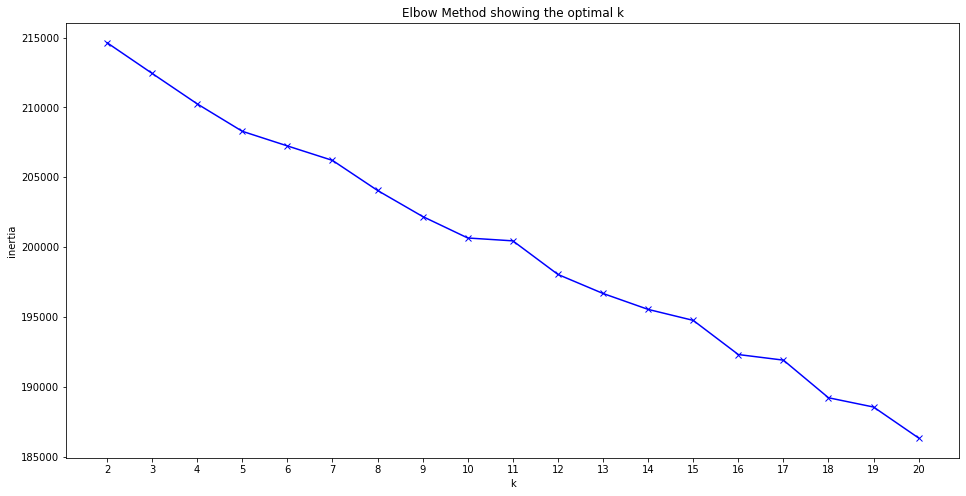

In [1235]:
K = range(2, 21)
inertia = []

for k in K:
    print(f"Training a K-Means model with {k} neighbours! ")
    #print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(Full_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

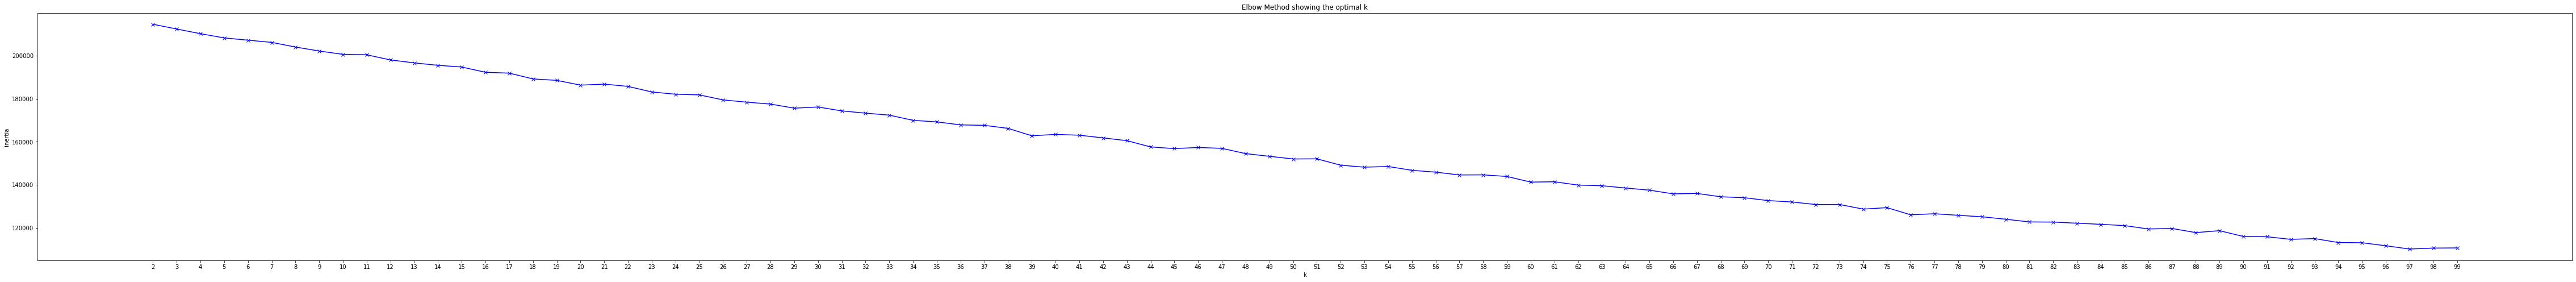

In [1117]:
plt.figure(figsize=(80,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

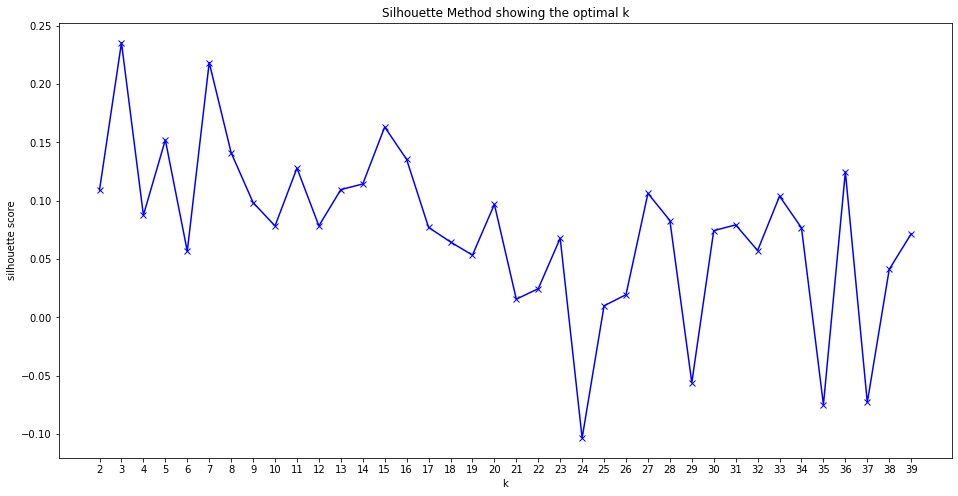

In [1101]:
K = range(2, 40)
silhouette = []

for k in K:
    
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(Full_scaled_df)
    #filename = "/content/drive/MyDrive/kmeans_" + str(k) + ".pickle" 
    #with open(filename, "wb") as f:
        #pickle.dump(kmeans,f)
    silhouette.append(silhouette_score(Full_scaled_df, kmeans.predict(Full_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [1130]:
from sklearn import metrics
from scipy.spatial.distance import cdist

In [1136]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 100)
 
for k in K:
    # Building and fitting the model
   
    #print(f"Training a K-Means model with {k} neighbours! ")
    #print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(Full_scaled_df)
    inertia.append(kmeans.inertia_)
 
    distortions.append(sum(np.min(cdist(Full_scaled_df, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / Full_scaled_df.shape[0])
    inertias.append(kmeans.inertia_)
 
    mapping1[k] = sum(np.min(cdist(Full_scaled_df, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / Full_scaled_df.shape[0]
    mapping2[k] = kmeans.inertia_

Training a K-Means model with 2 neighbours! 
Training a K-Means model with 3 neighbours! 
Training a K-Means model with 4 neighbours! 
Training a K-Means model with 5 neighbours! 
Training a K-Means model with 6 neighbours! 
Training a K-Means model with 7 neighbours! 
Training a K-Means model with 8 neighbours! 
Training a K-Means model with 9 neighbours! 
Training a K-Means model with 10 neighbours! 
Training a K-Means model with 11 neighbours! 
Training a K-Means model with 12 neighbours! 
Training a K-Means model with 13 neighbours! 
Training a K-Means model with 14 neighbours! 
Training a K-Means model with 15 neighbours! 
Training a K-Means model with 16 neighbours! 
Training a K-Means model with 17 neighbours! 
Training a K-Means model with 18 neighbours! 
Training a K-Means model with 19 neighbours! 
Training a K-Means model with 20 neighbours! 
Training a K-Means model with 21 neighbours! 
Training a K-Means model with 22 neighbours! 
Training a K-Means model with 23 neighbour

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

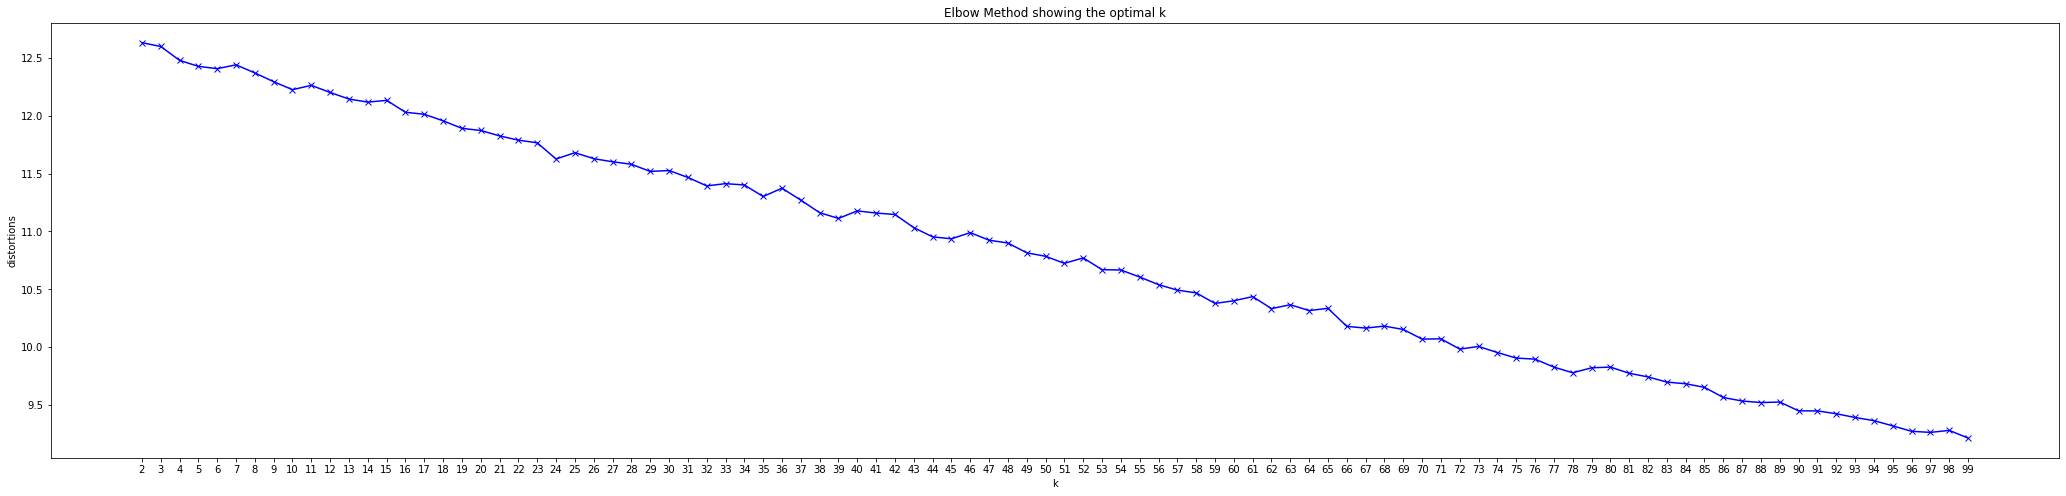

In [1141]:
plt.figure(figsize=(36,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('distortions')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [1142]:
print("Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.")

for key, val in mapping1.items(): # DISTORTION
    print(f'{key} : {val}')

2 : 12.632165017317973
3 : 12.59951556507265
4 : 12.479633466191572
5 : 12.427664084336735
6 : 12.407617311764673
7 : 12.440731260643544
8 : 12.370685926112738
9 : 12.294889082966677
10 : 12.226000325561719
11 : 12.26352900149042
12 : 12.201584998708809
13 : 12.144936103537386
14 : 12.118479438098454
15 : 12.133739633465028
16 : 12.030799847187899
17 : 12.013336752076112
18 : 11.95668194609064
19 : 11.891624919160964
20 : 11.873191361266514
21 : 11.826396231708086
22 : 11.789565276809821
23 : 11.766416926415431
24 : 11.626680002792199
25 : 11.681223129797942
26 : 11.629580552608079
27 : 11.60272824331495
28 : 11.581184905470888
29 : 11.519278814394953
30 : 11.526994162419234
31 : 11.467489998647597
32 : 11.39442132637621
33 : 11.413529572960881
34 : 11.402328155815674
35 : 11.302547927113244
36 : 11.374238571543867
37 : 11.27112186112752
38 : 11.162654155668676
39 : 11.112953485116655
40 : 11.177981824719511
41 : 11.159332942288565
42 : 11.147144226053
43 : 11.03332176236518
44 : 10.95

In [1160]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

2 : 214628.98087002736
3 : 212430.05031646966
4 : 210248.03514668703
5 : 208284.32338114703
6 : 207237.57466252343
7 : 206201.3601546028
8 : 204047.5995855994
9 : 202183.65396601916
10 : 200645.6514993187
11 : 200440.78075753144
12 : 198035.46062304647
13 : 196673.1493606152
14 : 195533.27520809285
15 : 194746.60412924673
16 : 192301.01266068174
17 : 191900.40889240144
18 : 189206.72659762777
19 : 188542.5145705554
20 : 186323.04652990098
21 : 186789.79252220126
22 : 185736.3162152966
23 : 183151.81370436406
24 : 182088.04757791062
25 : 181792.0871894354
26 : 179456.44531649607
27 : 178393.9234218166
28 : 177514.07743918308
29 : 175604.77241507286
30 : 176158.44062382565
31 : 174330.21213901468
32 : 173299.90289109
33 : 172361.40276518968
34 : 169948.34001700513
35 : 169230.7257735663
36 : 167835.8049359317
37 : 167628.27031746108
38 : 166207.65671416957
39 : 162770.81884452258
40 : 163404.2119317442
41 : 163031.63235188293
42 : 161785.23836091874
43 : 160502.98769456375
44 : 157587.31

#### Temporary stored Kmeans2

In [1245]:
kmeans2 = KMeans(n_clusters=16,
                init="random",
                n_init=3,  
                max_iter=2,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans2.fit(Full_scaled_df)
print(kmeans2)

KMeans(algorithm='full', init='random', max_iter=2, n_clusters=16, n_init=3,
       random_state=1234, tol=0)


In [1246]:
df_fullBG_ML['cluster'] = kmeans2.predict(Full_scaled_df)



#df_fullBG_ML["cluster"].iloc[]

pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", 150)
#df_fullBG_ML[df_fullBG_ML['cluster'] == 2].sample()

df_fullBG_ML["cluster"].value_counts().sort_index()

0     260
1       4
2       8
3       3
4      11
5      13
6       4
7      81
8     491
9      45
10      2
11      1
12      5
13      4
14     86
15      2
Name: cluster, dtype: int64

In [1253]:
df_fullBG_ML[df_fullBG_ML['cluster'] == 1].sample(4)

#df_fullBG_ML[df_fullBG_ML['BG_Name'] == 'Cards Against Humanity']#["BG_categories"] #-> cluster 0

,index,BG_ID,BG_Name,BG_url,BG_image_url,BG_price,BG_msrp,BG_min_players,BG_max_players,BG_mechanics,BG_categories,BG_avg_learning,BG_avg_strategy,BG_avg_rating,cluster
231,231,LZM8VP9UpT,A Game of Thrones: The Board Game Second Edition,https://www.boardgameatlas.com/game/LZM8VP9UpT/,https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1594388478866,47.96,60.00,3.0,6.0,"[{'id': 'Area Control', 'url': 'https://www.boardgameatlas.com/mechanic/05zCZoLvQJ/undefined'}, {'id': 'Area Movement', 'url': 'https://www.boardg...","[{'id': 'Fantasy'}, {'id': 'Medieval'}, {'id': 'Negotiation'}, {'id': 'Novel-based'}, {'id': 'Political'}, {'id': 'O0ogzwLUe8'}, {'id': 'ssZjU3HET...",4.666667,4.333333,3.546027,1
824,824,cVOMRdgFbs,The Oracle of Delphi,https://www.boardgameatlas.com/game/cVOMRdgFbs/,https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1559255087049-61rOqcPypqL.jpg,59.95,59.95,2.0,4.0,"[{'id': 'Dice Rolling', 'url': 'https://www.boardgameatlas.com/mechanic/R0bGq4cAl4/undefined'}, {'id': 'Engine Building', 'url': 'https://www.boar...","[{'id': 'Ancient'}, {'id': 'Racing'}, {'id': 'O0ogzwLUe8'}]",0.000000,0.000000,3.424444,1
341,341,54NFDYrC7y,Reef,https://www.boardgameatlas.com/game/54NFDYrC7y/,https://www.magicmadhouse.co.uk/images/plan-b-games-reef-second-edition-p360977-363452_medium.jpg,27.99,39.99,2.0,4.0,"[{'id': 'Hand Management', 'url': 'https://www.boardgameatlas.com/mechanic/WPytek5P8l/undefined'}, {'id': 'Pattern Building', 'url': 'https://www....","[{'id': 'Abstract'}, {'id': 'O0ogzwLUe8'}]",0.000000,0.000000,3.601721,1
13,13,VNBC6yq1WO,The Castles of Burgundy,https://www.boardgameatlas.com/game/VNBC6yq1WO/,https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1559254202422-51mP2aJfyxL.jpg,0.00,41.99,2.0,4.0,"[{'id': 'Dice Rolling', 'url': 'https://www.boardgameatlas.com/mechanic/R0bGq4cAl4/undefined'}, {'id': 'hUn7uJHrYm', 'url': 'https://www.boardgame...","[{'id': 'h8wfZG0j3I'}, {'id': 'Medieval'}, {'id': 'O0ogzwLUe8'}, {'id': 'Territory Building'}]",2.500000,3.250000,4.020586,1


## Input

In [1590]:
user_input = input("Please enter a boardgame you like:")

input_details(user_input)

Please enter a boardgame you like:Catan


0

## FINAL FUNCTION BELOW

Please enter a boardgame you like:CHESS
Is this the boardgame?

If the image is not enough, please check the following link: https://www.boardgameatlas.com/game/3hnL2wtWnM/


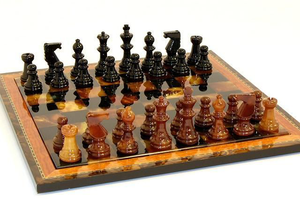

Please say if it's correct or not (Y/N)Y
You should try:
 Sushi Go Party! 



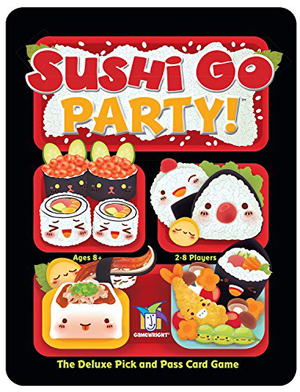

Boardgame rated = 3.58 / 5

Recommended price from manufacturer = 18.48 €

Minimum recommended players: 2

Maximum recommended players: 8



ConnectionError: HTTPSConnectionPool(host='api.boardgameatlas.com', port=443): Max retries exceeded with url: /api/search?name=Sushi%20Go%20Party!&client_id=U3E6STzUeQ&limit=0&skip=0&fields=rules_url (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000014D4489CC10>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [1853]:
#user_input = input('Please enter a boardgame you like:')
user_input = input("Please enter a boardgame you like:")

def input_details(user_input):
    
    try_1 = BG_requester(user_input,0,0)
    
    input_name = try_1["games"][0]["name"]
    
    input_id = try_1["games"][0]["id"]
    
    cluster_input = df_fullBG_ML[df_fullBG_ML["BG_ID"] == input_id]["cluster"]
       
    img_input = show_input_img(input_id)
   
    display(img_input)
    
    check_input = input("Please say if it's correct or not (Y/N)")
    
    if check_input == 'Y':
        pass
        
    else:
        user_input = input("Please enter another boardgame you like:")
        input_details(user_input)
            
    return cluster_input.iloc[0]

user_cluster = input_details(user_input)


get_recom_details(get_recom_id(user_cluster))

Please enter a boardgame you like:catan
Is this the boardgame?

If the image is not enough, please check the following link: https://www.boardgameatlas.com/game/OIXt3DmJU0/


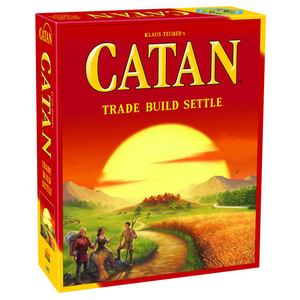

Please say if it's correct or not (Y/N)N
Please enter another boardgame you like:secrethitler
Is this the boardgame?

If the image is not enough, please check the following link: https://www.boardgameatlas.com/game/OIXt3DmJU0/


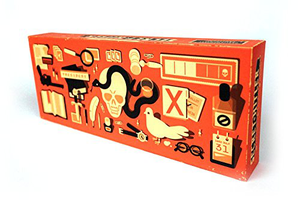

Please say if it's correct or not (Y/N)Y
eh0GTvESIX
You should try:
 Jaipur 

How does the recommendation look to you?



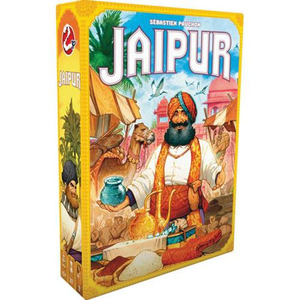

Boardgame rated = 3.7 / 5

Recommended price from manufacturer = 20.99 €

Minimum recommended players: 2

Maximum recommended players: 2

If you wish to know how to play it use following link:
 https://www.fgbradleys.com/rules/rules2/Jaipur-rules.pdf

For more info click on the link:
 https://www.boardgameatlas.com/game/eh0GTvESIX/


In [1662]:
Recommend_me_boardgames()

In [ ]:
def Recommend_me_boardgames():
    user_input = input("Please enter a boardgame you like:")

    input_details(user_input)

    get_recom_details(get_recom_id(user_cluster))
    
    return

#### Details of user's input BG

In [1298]:
# ID

try_1["games"][0]["id"]

# NAME
try_1["games"][0]["name"]

# PRICE

try_1["games"][0]["price"]
try_1["games"][0]["msrp"]

# Game's URL

try_1["games"][0]["url"]

#IMAGE OF BOARD GAME

try_1["games"][0]["image_url"]

# RULES_url
try_1["games"][0]["rules_url"]

# MIN & MAX PLAYERS

try_1["games"][0]["min_players"]
try_1["games"][0]["max_players"]

# RATING

user_rating = str(round(try_1["games"][0]["average_user_rating"], 2)) + ' / 5' # round 2 decimal add '/5' AND IF >0 PRINT if not: dont print
user_rating



'https://www.catan.com/game/catan#prof-easy'

In [1535]:
try_1["games"][0]["rules_url"]

'https://www.catan.com/game/catan#prof-easy'

In [1336]:
try_1["games"][0]["url"]

'https://www.boardgameatlas.com/game/OIXt3DmJU0/'

In [1308]:
def DB_search_id(user_input):
    search_DF = try_1["games"][0]["id"]
    return search_DF


search_DF = DB_search_cluster(user_input)
search_DF

'OIXt3DmJU0'

In [1591]:
def DB_user_cluster(input_id):

    user_cluster = df_fullBG_ML[df_fullBG_ML["BG_ID"] == input_id]["cluster"]
    
    return user_cluster.iloc[0]

print("User's input boardgame apartains to cluster nº", DB_user_cluster())



TypeError: DB_user_cluster() missing 1 required positional argument: 'input_id'

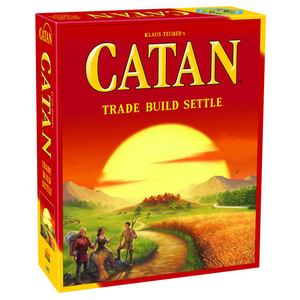

In [1327]:
input_url = try_1["games"][0]["image_url"]
response = requests.get(input_url)
response

input_img = Image.open(BytesIO(response.content))

basewidth = 300
img = Image.open(BytesIO(response.content))
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
img.save('somepic.jpg')


img

In [1682]:
BG_requester("Cards against humanity",0,0)

{'games': [{'id': 'dFC1lnGINr',
   'name': 'Cards Against Humanity',
   'url': 'https://www.boardgameatlas.com/game/dFC1lnGINr/',
   'price': '25.00',
   'msrp': '0.00',
   'min_players': 4,
   'max_players': 30,
   'image_url': 'https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1559257709006-41mECnRToeL.jpg',
   'mechanics': [{'id': 'WPytek5P8l'}, {'id': 'DEvPj5twid'}],
   'categories': [{'id': 'eX8uuNlQkQ'}, {'id': 'X8J7RM6dxX'}],
   'rules_url': None,
   'average_user_rating': 2.4995459548706647,
   'average_learning_complexity': 1,
   'average_strategy_complexity': 1},
  {'id': 'cb1DcPrnkz',
   'name': 'Secret Hitler',
   'url': 'https://www.boardgameatlas.com/game/cb1DcPrnkz/',
   'price': '77.47',
   'msrp': '35.00',
   'min_players': 5,
   'max_players': 10,
   'image_url': 'https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1559257704919-51BpeBNTi-L.jpg',
   'mechanics': [{'id': 'ZX3hYcF9H7'},
    {'id': 'hwyCo1W0hi'},
    {'id': 'U7vKyeRc0N'},
    {'id': '

How does the recommendation look to you?



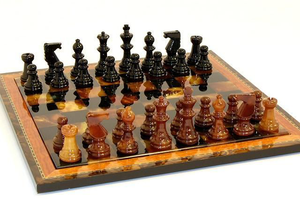

In [1672]:
def show_input_img(input_id):
    recom_url = df_fullBG_ML[df_fullBG_ML["BG_ID"] == input_id]["BG_image_url"].iloc[0]
    #input_url = try_1["games"][0]["image_url"]
    response = requests.get(recom_url)
    response

    #recomm_img = Image.open(BytesIO(response.content))

    basewidth = 300
    recomm_img = Image.open(BytesIO(response.content))
    wpercent = (basewidth/float(recomm_img.size[0]))
    hsize = int((float(recomm_img.size[1])*float(wpercent)))
    img = recomm_img.resize((basewidth,hsize), Image.ANTIALIAS)
    #img.save('somepic.jpg')
    print('Is this the boardgame?\n')
    print("If the image is not enough, please check the following link:", df_fullBG_ML[df_fullBG_ML["BG_ID"] == input_id]["BG_url"].iloc[0])
    
    
    
    return img






Thanks! Check if this is the boardgame you selected.
If the image is not enough, please check the following link: https://www.boardgameatlas.com/game/OIXt3DmJU0/


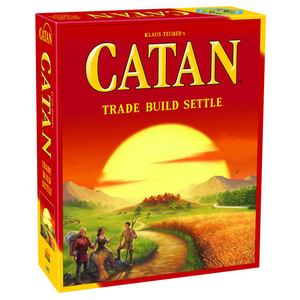

In [1587]:
def check_correct_BG_selection():

    input_url = try_1["games"][0]["image_url"]
    response = requests.get(input_url)
    response

    input_img = Image.open(BytesIO(response.content))

    basewidth = 300
    img = Image.open(BytesIO(response.content))
    wpercent = (basewidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((basewidth,hsize), Image.ANTIALIAS)
    #img.save('somepic.jpg')
    print('Thanks! Check if this is the boardgame you selected.')
    print("If the image is not enough, please check the following link:", try_1["games"][0]["url"])
    return img



check_correct_BG_selection()

## Output

####  RECOMM INDEX

In [1611]:
user_cluster = 0


def get_recom_id(user_cluster):
    cluster_recomm = user_cluster
    cluster_row = df_fullBG_ML[df_fullBG_ML['cluster'] == cluster_recomm].sample()
    recom_id = cluster_row["BG_ID"]
    
    #recom_name = df_fullBG_ML[df_fullBG_ML["index"] == recom_index.iloc[0]]["BG_Name"].iloc[0]
    
    #print("You should try:",recom_name)
    
    #print('efelino')
    #display(show_recom_img())
    
    return recom_id.iloc[0]

get_recom_id(user_cluster)



'2eoe0273LD'

####  RECOMM FULL DETAILS

In [1849]:
def get_recom_details(recom_id):
    #print(recom_id)    
    recom_name = df_fullBG_ML[df_fullBG_ML["BG_ID"] == recom_id]["BG_Name"].iloc[0]
    print("You should try:\n", recom_name, '\n')
    img = show_recom_img(recom_id)
    display(img)
    
    
    
    
    recom_rating(recom_id)
    
    recom_msrp(recom_id)
    
       
    show_players(recom_id)
    
    recom_rules(recom_id)
    
    return #img #recom_name


#get_recom_details(get_recom_id())


In [1658]:
df_fullBG_ML[df_fullBG_ML["BG_avg_rating"] > 4.5]["BG_Name"]

93                          Gloomhaven: Jaws of the Lion
530                        Mage Knight: Ultimate Edition
630                                     Forgotten Waters
642                                      Concordia Venus
762    The Castles of Burgundy: 20th Anniversary Edition
Name: BG_Name, dtype: object

In [1659]:
df_fullBG_ML[df_fullBG_ML["BG_Name"] == 'Gloomhaven: Jaws of the Lion']


,index,BG_ID,BG_Name,BG_url,BG_image_url,BG_price,BG_msrp,BG_min_players,BG_max_players,BG_mechanics,BG_categories,BG_avg_learning,BG_avg_strategy,BG_avg_rating,cluster
93,93,08asLSfoZy,Gloomhaven: Jaws of the Lion,https://www.boardgameatlas.com/game/08asLSfoZy/,https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1596502720802,34.99,49.99,1.0,4.0,"[{'id': 'Acting', 'url': 'https://www.boardgameatlas.com/mechanic/n1GtBt35Rd/undefined'}, {'id': 'Action / Movement Programming', 'url': 'https://...","[{'id': 'Adventure'}, {'id': 'Cooperative'}, {'id': 'Exploration'}, {'id': 'Fantasy'}, {'id': 'Fighting'}, {'id': 'Solo / Solitaire'}]",2.5,3.5,4.565909,14


####  RECOMM IMG

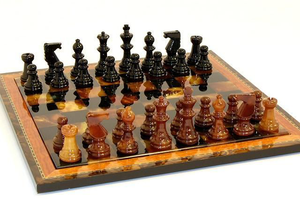

In [1700]:
recom_id = '3hnL2wtWnM'

def show_recom_img(recom_id):
    recom_url = df_fullBG_ML[df_fullBG_ML["BG_ID"] == recom_id]["BG_image_url"].iloc[0]
    #input_url = try_1["games"][0]["image_url"]
    response = requests.get(recom_url)
    response

    #recomm_img = Image.open(BytesIO(response.content))

    basewidth = 300
    recomm_img = Image.open(BytesIO(response.content))
    wpercent = (basewidth/float(recomm_img.size[0]))
    hsize = int((float(recomm_img.size[1])*float(wpercent)))
    img = recomm_img.resize((basewidth,hsize), Image.ANTIALIAS)
    #img.save('somepic.jpg')
    
    #print("If the image is not enough, please check the following link:", try_1["games"][0]["url"])
    
    
    return img



#show_recom_img('3hnL2wtWnM')


#### MIN and MAX PLAYERS

In [1458]:

def show_players(recom_id):
    recom_min_players = int(df_fullBG_ML[df_fullBG_ML["BG_ID"] == recom_id]["BG_min_players"].iloc[0])
    
    recom_max_players = int(df_fullBG_ML[df_fullBG_ML["BG_ID"] == recom_id]["BG_max_players"].iloc[0])
    
    print(f'Minimum recommended players: {recom_min_players}\n')
    print(f'Maximum recommended players: {recom_max_players}\n')
    
    
    #print("If the image is not enough, please check the following link:", try_1["games"][0]["url"])
    return 

#### RECOMM RATING

In [1475]:
def recom_rating(recom_id):
    rating = round(df_fullBG_ML[df_fullBG_ML["BG_ID"] == recom_id]["BG_avg_rating"].iloc[0],2)
    
    print('Boardgame rated =', rating, "/ 5\n")
    
    return

recom_rating('3hnL2wtWnM')

Boardgame rated = 3.34 / 5



#### RECOMM MSRP

In [1699]:
recom_id = 'unMxq0jVdk'

def recom_msrp(recom_id):
    msrp = df_fullBG_ML[df_fullBG_ML["BG_ID"] == recom_id]["BG_msrp"].iloc[0]
    
    msrp_eur = float(msrp) * 0.84
    
    if msrp_eur != 0.00:
        print('Recommended price from manufacturer =', round(msrp_eur,2), "€\n")
    
    else:
        print("Sorry, can't give a price. It could well be... a FREE game!")
       
    return

recom_msrp(recom_id)

Recommended price from manufacturer = 33.59 €



#### RECOMM RULES URL

In [1839]:
recom_name = df_fullBG_ML[df_fullBG_ML["BG_ID"] == recom_id]["BG_Name"].iloc[0]

def rules_requester(search_rules):
    
    '''
   
    
    '''   
    FULLREQ_bgatlas = requests.get(url = f'https://api.boardgameatlas.com/api/search?name={search_rules}&client_id=U3E6STzUeQ&limit=0&skip=0&fields=rules_url')
    FULLREQ_databg = json.loads(FULLREQ_bgatlas.text)
    #print(FULLREQ_databg["games"][1]["rules_url"])
    return FULLREQ_databg["games"][1]["rules_url"]

rules_requester('Gùgōng')

'http://secrethitler.com/assets/Secret_Hitler_Rules.pdf'

In [1834]:
def recom_rules(recom_id):
    
    recom_rules = df_fullBG_ML[df_fullBG_ML["BG_ID"] == recom_id]["BG_Name"].iloc[0]
    #print(recom_rules)
    rules_link = rules_requester(recom_rules)
    #print(rules_link)
    if rules_link != None:
        print("If you wish to know how to play it use following link:\n", rules_link)
    else:
        pass
     
    recom_url = df_fullBG_ML[df_fullBG_ML["BG_ID"] == recom_id]["BG_url"].iloc[0]
    print("\nFor more info click on the link:\n", recom_url)
    return

recom_rules('cb1DcPrnkz')

http://secrethitler.com/assets/Secret_Hitler_Rules.pdf

For more info click on the link:
 https://www.boardgameatlas.com/game/cb1DcPrnkz/


In [1357]:
cluster_recomm = DB_user_cluster()
cluster_row = df_fullBG_ML[df_fullBG_ML['cluster'] == cluster_recomm].sample()
#recom_name = df_fullBG_ML[df_fullBG_ML['index'] == cluster_row["index"]]


#print(cluster_row)
recom_index = cluster_row["index"]

df_fullBG_ML[df_fullBG_ML["index"] == recom_index.iloc[0]]["BG_Name"].iloc[0]

'Scythe: Invaders from Afar'

# DEMO

Please enter a boardgame you like:CHESS
Is this the boardgame?

If the image is not enough, please check the following link: https://www.boardgameatlas.com/game/3hnL2wtWnM/


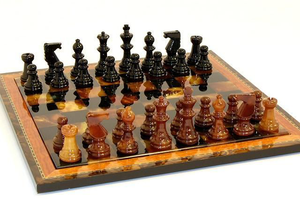

Please say if it's correct or not (Y/N)N
Please enter another boardgame you like:POKER
Is this the boardgame?

If the image is not enough, please check the following link: https://www.boardgameatlas.com/game/xmnVgGdFuI/


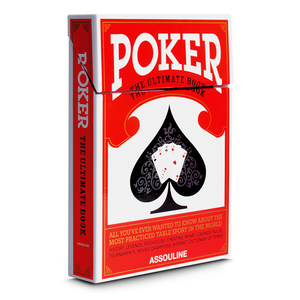

Please say if it's correct or not (Y/N)Y
You should try:
 Lotus 



ConnectionError: HTTPSConnectionPool(host='s3-us-west-1.amazonaws.com', port=443): Max retries exceeded with url: /5cc.images/games/uploaded/1559254183527-51AsI9Gi8lL.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000014D448B3820>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [1860]:
Recommend_me_boardgames()

In [ ]:
Recommend_me_boardgames()

In [1754]:
df_fullBG_ML[df_fullBG_ML['cluster'] == 8].sample(6)

,index,BG_ID,BG_Name,BG_url,BG_image_url,BG_price,BG_msrp,BG_min_players,BG_max_players,BG_mechanics,BG_categories,BG_avg_learning,BG_avg_strategy,BG_avg_rating,cluster
649,649,nErpFnUWwP,Happy Salmon,https://www.boardgameatlas.com/game/nErpFnUWwP/,https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1559253940411-51qbs5Ay1LL.jpg,14.99,14.99,3.0,6.0,"[{'id': 'Simultaneous Play', 'url': 'https://www.boardgameatlas.com/mechanic/DEvPj5twid/undefined'}]",[],0.0,0.0,3.304878,8
991,1,qtQW5EIDA7,Wizard,https://www.boardgameatlas.com/game/qtQW5EIDA7/,https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1559254873443-515w8FbQQEL.jpg,6.99,0.00,3.0,6.0,[],[{'id': 'Card Game'}],0.0,0.0,3.178571,8
245,245,w8zjnqTtsZ,Concordia: Britannia & Germania,https://www.boardgameatlas.com/game/w8zjnqTtsZ/,https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1541652615050,33.86,24.95,2.0,5.0,[],[{'id': 'Expansion'}],0.0,0.0,3.882653,8
876,876,qGQBOFz4TG,Suburbia Inc,https://www.boardgameatlas.com/game/qGQBOFz4TG/,https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1559254970101-41E1i2bnqWL.jpg,15.00,29.99,1.0,4.0,"[{'id': 'Modular Board', 'url': 'https://www.boardgameatlas.com/mechanic/U3zhCQH7Et/undefined'}, {'id': 'Tile Placement', 'url': 'https://www.boar...",[],0.0,0.0,3.761905,8
472,472,YfElAOb9o7,Sidereal Confluence,https://www.boardgameatlas.com/game/YfElAOb9o7/,https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1559258094785-619ibe9JFFL.jpg,49.99,46.99,4.0,9.0,"[{'id': 'Auction', 'url': 'https://www.boardgameatlas.com/mechanic/AZxlPpi5oq/undefined'}, {'id': 'Negotiation', 'url': 'https://www.boardgameatla...","[{'id': 'Economic'}, {'id': 'Negotiation'}, {'id': 'Sci-Fi'}]",0.0,0.0,3.877193,8
30,30,T5lx9elSDt,Love Letter,https://www.boardgameatlas.com/game/T5lx9elSDt/,https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1540911025441,9.34,9.99,2.0,4.0,"[{'id': 'Hand Management', 'url': 'https://www.boardgameatlas.com/mechanic/WPytek5P8l/undefined'}, {'id': 'Player Elimination', 'url': 'https://ww...",[{'id': 'Card Game'}],0.0,0.0,3.424669,8


In [1822]:
df_fullBG_ML[df_fullBG_ML["BG_ID"] == "cb1DcPrnkz"]#["BG_mechanics"].iloc[0]#["BG_categories"]#.iloc[0]

,index,BG_ID,BG_Name,BG_url,BG_image_url,BG_price,BG_msrp,BG_min_players,BG_max_players,BG_mechanics,BG_categories,BG_avg_learning,BG_avg_strategy,BG_avg_rating,cluster
132,132,cb1DcPrnkz,Secret Hitler,https://www.boardgameatlas.com/game/cb1DcPrnkz/,https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1559257704919-51BpeBNTi-L.jpg,35.00,35.00,5.0,10.0,"[{'id': 'Bluffing', 'url': 'https://www.boardgameatlas.com/mechanic/ZX3hYcF9H7/undefined'}, {'id': 'Conversation', 'url': 'https://www.boardgameat...","[{'id': 'Bluffing'}, {'id': 'Card Game'}, {'id': 'Humor'}, {'id': 'Party Game'}, {'id': 'Political'}]",2.0,3.0,3.652044,0


In [1810]:
df_fullBG_ML[df_fullBG_ML["BG_Name"] == 'Secret Hitler']#["BG_categories"]#.iloc[0]

,index,BG_ID,BG_Name,BG_url,BG_image_url,BG_price,BG_msrp,BG_min_players,BG_max_players,BG_mechanics,BG_categories,BG_avg_learning,BG_avg_strategy,BG_avg_rating,cluster
132,132,cb1DcPrnkz,Secret Hitler,https://www.boardgameatlas.com/game/cb1DcPrnkz/,https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1559257704919-51BpeBNTi-L.jpg,35.00,35.00,5.0,10.0,"[{'id': 'Bluffing', 'url': 'https://www.boardgameatlas.com/mechanic/ZX3hYcF9H7/undefined'}, {'id': 'Conversation', 'url': 'https://www.boardgameat...","[{'id': 'Bluffing'}, {'id': 'Card Game'}, {'id': 'Humor'}, {'id': 'Party Game'}, {'id': 'Political'}]",2.0,3.0,3.652044,0


In [1791]:
df_fullBG_ML[df_fullBG_ML["BG_ID"] == "74f9mzbw9Y"]["BG_Name"].iloc[0]

'Exploding Kittens'

In [1745]:
df_fullBG_ML[df_fullBG_ML["BG_ID"] == "74f9mzbw9Y"]["BG_categories"].iloc[0]



[{'id': 'Animals'}, {'id': 'Humor'}, {'id': 'Kickstarter'}]

In [1796]:
df_fullBG_ML[df_fullBG_ML["BG_avg_rating"] <= 2.5]["cluster"]#["BG_avg_rating"]#.iloc[0]

318    0
328    8
424    8
438    8
550    0
897    0
919    8
927    8
Name: cluster, dtype: int32

In [ ]:
df_fullBG_ML[df_fullBG_ML["BG_min_players"] >= 2]["cluster"]

In [1742]:
BG_requester("Exploding Kittens",0,0)

{'games': [{'id': '74f9mzbw9Y',
   'name': 'Exploding Kittens',
   'url': 'https://www.boardgameatlas.com/game/74f9mzbw9Y/',
   'price': '19.82',
   'msrp': '0.00',
   'min_players': 2,
   'max_players': 5,
   'image_url': 'https://s3-us-west-1.amazonaws.com/5cc.images/games/uploaded/1559257206847-51osODpsNIL.jpg',
   'mechanics': [{'id': 'WPytek5P8l'},
    {'id': 'BGrhzIN69D'},
    {'id': 'hmipYN1R1I'}],
   'categories': [{'id': 'MWoxgHrOJD'},
    {'id': 'TYnxiuiI3X'},
    {'id': 'rrvd68LjOR'}],
   'rules_url': 'https://explodingkittens.com/downloads/rules/Exploding-Kittens_Rules.pdf',
   'average_user_rating': 2.496860870961805,
   'average_learning_complexity': 1,
   'average_strategy_complexity': 1},
  {'id': 'RKBXfWcCjP',
   'name': 'Exploding Kittens: Imploding Kittens',
   'url': 'https://www.boardgameatlas.com/game/RKBXfWcCjP/',
   'price': '14.99',
   'msrp': '0.00',
   'min_players': 2,
   'max_players': 6,
   'image_url': 'https://s3-us-west-1.amazonaws.com/5cc.images/games/

In [1783]:
stats_df = df_fullBG_ML.copy()

In [1795]:
pd.to_numeric(stats_df["BG_max_players"]).mean()

5.344861660079052

In [1789]:
pd.to_numeric(stats_df[stats_df["BG_avg_rating"] < 4.5]["BG_price"]).mean()

39.23582266009868